# Supervised Learning

> **Reference**: *Introduction to Machine Learning with Python* -- Andreas C. Mueller & Sarah Guido

This notebook covers the fundamentals of supervised machine learning:

- Classification vs. Regression
- Generalization, Overfitting, and Underfitting
- k-Nearest Neighbors (classification and regression)
- Linear Models: OLS, Ridge, Lasso, Logistic Regression, Linear SVM
- Multiclass Classification with One-vs-Rest
- Naive Bayes Classifiers
- Decision Trees and Ensemble Methods (Random Forests, Gradient Boosting)
- Kernelized Support Vector Machines
- Neural Networks (Multilayer Perceptrons)
- Uncertainty Estimates from Classifiers

## Setup

In [1]:
!pip install -q mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.1 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings('ignore')

## 1. Classification and Regression

Supervised learning has two major types of problems:

| Type | Goal | Output | Example |
|------|------|--------|---------|
| **Classification** | Predict a class label | Discrete category | Spam detection, iris species |
| **Regression** | Predict a continuous value | Real number | Income prediction, crop yield |

### Binary vs. Multiclass Classification

- **Binary classification**: Distinguishing between exactly two classes (e.g., spam vs. not spam). One class is conventionally called the *positive* class and the other the *negative* class. Which is which depends on the domain.
- **Multiclass classification**: Distinguishing between more than two classes (e.g., predicting the language of a website from its text).

### How to Tell Them Apart

Ask: *is there continuity in the output?*

- If **yes**, it is a regression problem. Predicting someone's income as \$40,000 or \$40,001 is a negligible difference -- the output is a continuous quantity.
- If **no**, it is a classification problem. A website is in English or French -- there is no meaningful "in-between."

## 2. Generalization, Overfitting, and Underfitting

### Key Concepts

- **Generalization**: The ability of a model to make accurate predictions on new, unseen data.
- **Overfitting**: The model is too complex. It memorizes the training data (including noise) and fails on new data. Symptom: high training accuracy, low test accuracy.
- **Underfitting**: The model is too simple. It cannot capture the underlying patterns. Symptom: low accuracy on both training and test data.

### The Boat-Buying Example

Consider this customer dataset:

| Age | Cars | House | Children | Marital Status | Dog | Bought Boat |
|-----|------|-------|----------|----------------|-----|-------------|
| 66  | 1    | yes   | 2        | widowed        | no  | **yes**     |
| 52  | 2    | yes   | 3        | married        | no  | **yes**     |
| 22  | 0    | no    | 0        | married        | yes | no          |
| 25  | 1    | no    | 1        | single         | no  | no          |
| 44  | 0    | no    | 2        | divorced       | yes | no          |
| 39  | 1    | yes   | 2        | married        | yes | no          |
| 26  | 1    | no    | 2        | single         | no  | no          |
| 40  | 3    | yes   | 1        | married        | yes | no          |
| 53  | 2    | yes   | 2        | divorced       | no  | **yes**     |
| 64  | 2    | yes   | 3        | divorced       | no  | no          |
| 58  | 2    | yes   | 2        | married        | yes | **yes**     |
| 33  | 1    | no    | 1        | single         | no  | no          |

Consider a dataset of 12 customers. A novice data scientist derives the rule:

> *"If the customer is older than 45, and has fewer than 3 children or is not divorced, then they want to buy a boat."*

This rule achieves 100% accuracy on the 12 training samples. But it is overly specific -- the "or is not divorced" clause hinges on a single data point. A simpler rule like "people older than 50 want to buy a boat" would likely generalize better.

### The Bias-Variance Trade-off

There is a fundamental tension in model selection:

- **More complex** models fit training data better but risk overfitting (high variance).
- **Simpler** models are more robust to noise but risk underfitting (high bias).

The goal is to find the **sweet spot** between these extremes -- the model complexity that minimizes the total error on unseen data.

### Model Complexity and Dataset Size

Model complexity is tied to the amount and variety of training data:

- Larger, more varied datasets can support more complex models without overfitting.
- Simply duplicating data does not help -- you need genuine variety.
- In practice, collecting more data is often more effective than building a fancier model.

## 3. Sample Datasets

We use both synthetic (small, easy to visualize) and real-world datasets to explore different algorithms. Keep in mind that intuitions from low-dimensional datasets do not always transfer to high-dimensional settings.

### 3.1 Forge Dataset (Classification)

A synthetic two-class dataset with only two features. With just 26 data points and 2 dimensions, it is ideal for visualizing classification boundaries.

X.shape: (26, 2)


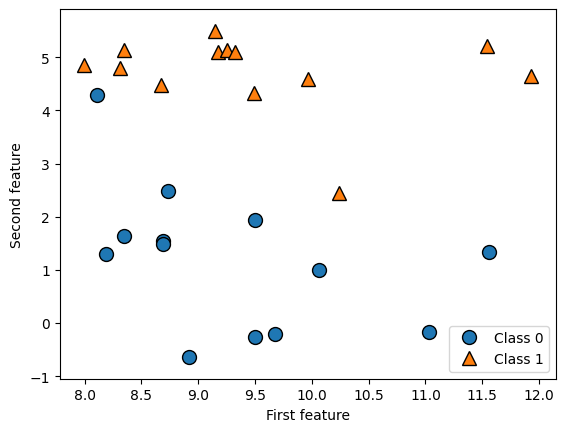

In [3]:
# Generate dataset
X, y = mglearn.datasets.make_forge()

# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

The dataset has shape `(26, 2)`: 26 samples and 2 features. The scatter plot shows a clear but imperfect separation between Class 0 and Class 1 in the two-dimensional feature space. Some points from both classes overlap near the boundary region, which is typical of real classification problems.

### 3.2 Wave Dataset (Regression)

A synthetic dataset with a single input feature and a continuous target variable. This one-dimensional setting allows us to directly visualize the relationship between feature and target.

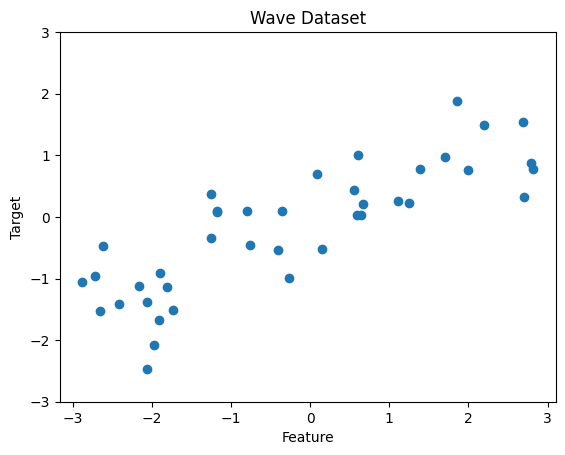

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Wave Dataset")
plt.show()

Each dot represents one sample. The target values range roughly from -3 to 3, and the relationship between the feature and the target is clearly nonlinear -- a simple straight line will not capture all the variation in this data.

### 3.3 Breast Cancer Dataset (Real-World Classification)

The Wisconsin Breast Cancer dataset contains clinical measurements of breast cancer tumors. The task is binary classification: predict whether a tumor is **benign** or **malignant** based on 30 numeric features.

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys():", cancer.keys())
print("\nShape of cancer data:", cancer.data.shape)
print("\nSample counts per class:")
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("\nFeature names:")
print(cancer.feature_names)

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Shape of cancer data: (569, 30)

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The dataset contains 569 samples and 30 features. The class distribution is imbalanced: 357 benign vs. 212 malignant tumors (roughly 63% vs. 37%). Each feature represents a physical measurement of the tumor such as radius, texture, perimeter, area, and smoothness. The features are organized in groups of ten: mean values, standard errors, and "worst" (largest) values.

### 3.4 Boston Housing Dataset (Real-World Regression)

The Boston Housing dataset contains 506 samples with 13 original features describing neighborhoods in Boston (crime rate, proximity to the Charles River, etc.). The target is the median home value.

We use the extended version from `mglearn` which includes all pairwise feature interactions. The number of interactions from 13 features is $\binom{13}{2} = 91$, giving $13 + 91 = 104$ features total.

In [6]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)
print("\nThe 104 features = 13 original + 91 pairwise interactions")

X.shape: (506, 104)

The 104 features = 13 original + 91 pairwise interactions


The extended dataset has 506 samples and 104 features. The additional 91 interaction features (products of every pair of original features) allow linear models to capture nonlinear relationships. This technique is called **feature engineering** and is covered in more detail in Chapter 4.

## 4. k-Nearest Neighbors (k-NN)

The k-NN algorithm is conceptually the simplest machine learning algorithm:

1. **Training**: Store the entire training dataset. No computation is needed.
2. **Prediction**: For a new data point, find the $k$ closest points in the training set (the "nearest neighbors"). For classification, take a majority vote among their labels. For regression, take the mean of their target values.

The distance between points is typically measured using **Euclidean distance**:

$$d(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{\sum_{j=1}^{p}(x_{1j} - x_{2j})^2}$$

where $p$ is the number of features.

### 4.1 k-NN Classification

#### Visualizing 1-Nearest Neighbor

With $k=1$, each test point is assigned the label of its single closest training point.

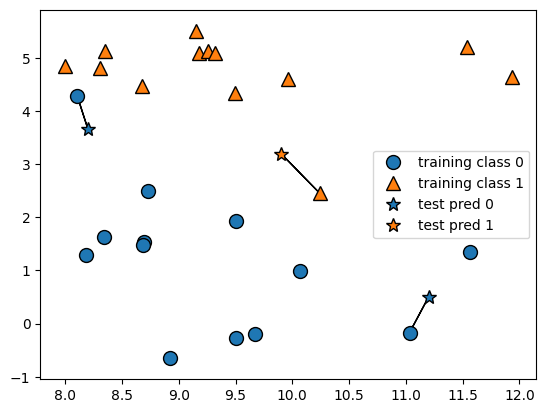

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Each star represents a new test point. The colored cross next to it marks the nearest training point. The prediction is simply that neighbor's label. With $k=1$, the model is highly sensitive to individual training points, including potential outliers.

#### Visualizing 3-Nearest Neighbors

With $k=3$, the algorithm considers the three closest training points and assigns the majority class label.

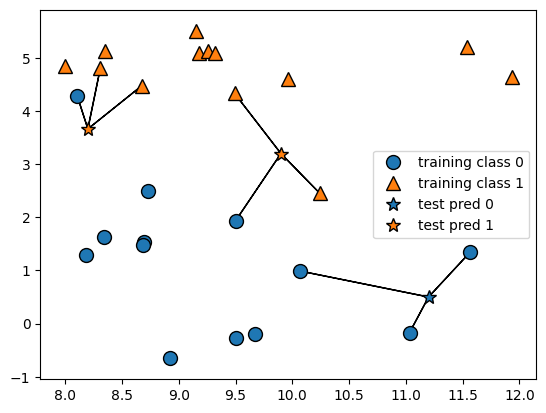

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Notice that the prediction for the top-left test point differs from the $k=1$ case. With more neighbors, the model is less influenced by any single point and produces more stable predictions.

#### Training and Evaluating k-NN

We split the data into training and test sets, fit a `KNeighborsClassifier` with $k=3$, and evaluate its accuracy.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


The model predicts 7 test samples with an accuracy of 86% (6 out of 7 correct). Accuracy is defined as:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

For this small test set: $\text{Accuracy} = 6/7 \approx 0.857$.

#### Decision Boundaries for Different $k$ Values

The decision boundary is the border in feature space where the model switches its predicted class. By coloring all regions of the plane, we can see how the boundary changes with $k$.

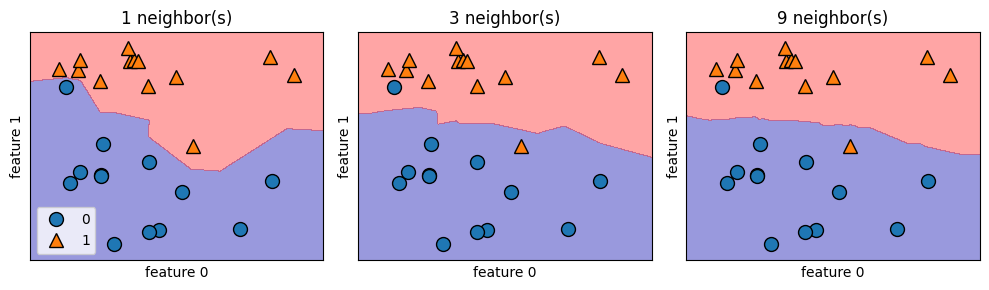

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.tight_layout()

Three key observations:

- **$k=1$**: The boundary is very irregular, closely following individual training points. This is a high-complexity model that is prone to overfitting.
- **$k=3$**: The boundary is smoother. The model generalizes better because it averages over more neighbors.
- **$k=9$**: The boundary is very smooth (almost linear). This is a low-complexity model. If $k$ equals the total number of training points, the model would always predict the majority class.

This illustrates a general principle: **fewer neighbors = more complex model, more neighbors = simpler model**.

#### Model Complexity vs. Generalization on Breast Cancer Data

We train k-NN classifiers with $k = 1$ to $10$ on the Breast Cancer dataset and plot both training and test accuracy to observe the overfitting/underfitting trade-off.

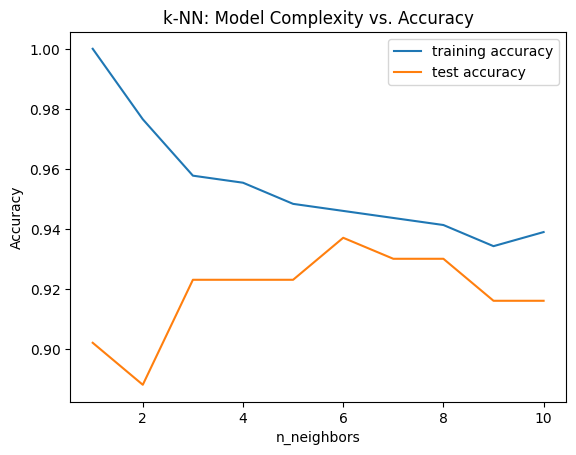

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("k-NN: Model Complexity vs. Accuracy")
plt.show()

Key observations from the plot:

- At $k=1$, training accuracy is 100% (the model memorizes the training set), but test accuracy is lower -- a classic sign of **overfitting**.
- As $k$ increases, training accuracy decreases (the model becomes simpler), while test accuracy initially improves.
- The best test accuracy is around $k=6$, which represents the sweet spot between overfitting and underfitting.
- At $k=10$, the model is too simple and test accuracy drops -- beginning to **underfit**.

Note that even the worst accuracy here is around 88%, so all configurations are reasonably good for this dataset.

### 4.2 k-NN Regression

#### Visualizing 1-Nearest Neighbor Regression

For regression with $k=1$, the prediction for a new point is simply the target value of its single closest neighbor.

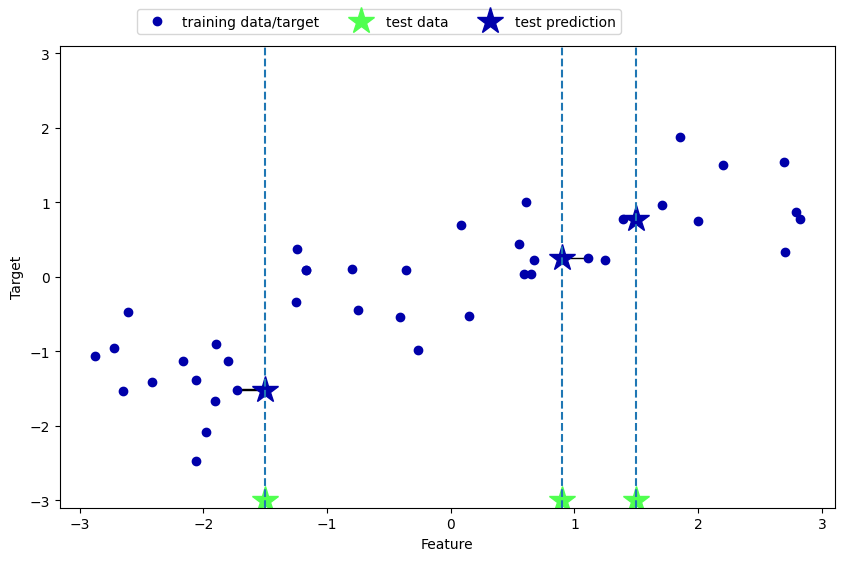

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

The green stars on the x-axis are test points, and the blue stars show the predicted values. Each prediction is the exact target value of the closest training point. The resulting prediction function is a step-like curve that passes through every training point.

#### Visualizing 3-Nearest Neighbors Regression

With $k=3$, the prediction is the **arithmetic mean** of the three nearest neighbors' target values:

$$\hat{y} = \frac{1}{k} \sum_{i \in N_k(\mathbf{x})} y_i$$

where $N_k(\mathbf{x})$ is the set of $k$ nearest neighbors of point $\mathbf{x}$.

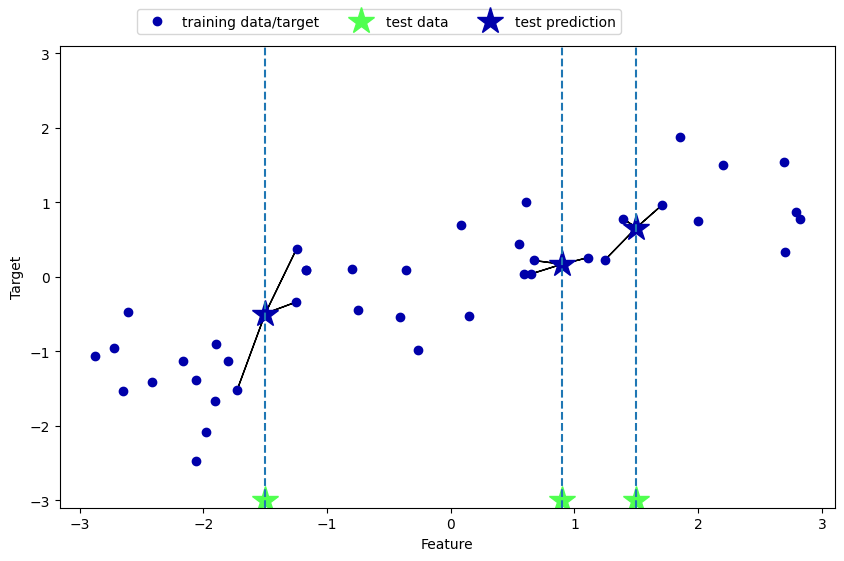

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

By averaging over three neighbors, the predictions are smoother and less affected by individual noisy points compared to $k=1$.

#### Training and Evaluating k-NN Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set predictions:\n", reg.predict(X_test))
print("\nTest set R²: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Test set R²: 0.83


The model achieves an $R^2$ score of 0.83. The $R^2$ (coefficient of determination) measures how well the model explains the variance in the target:

$$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

where $\bar{y}$ is the mean of the true target values.

- $R^2 = 1$: perfect prediction.
- $R^2 = 0$: the model is no better than always predicting the mean.
- $R^2 < 0$: the model is worse than predicting the mean.

A score of 0.83 means the model explains 83% of the variance in the target -- a reasonably good fit.

#### Analyzing k-NN Regression: Effect of `n_neighbors`

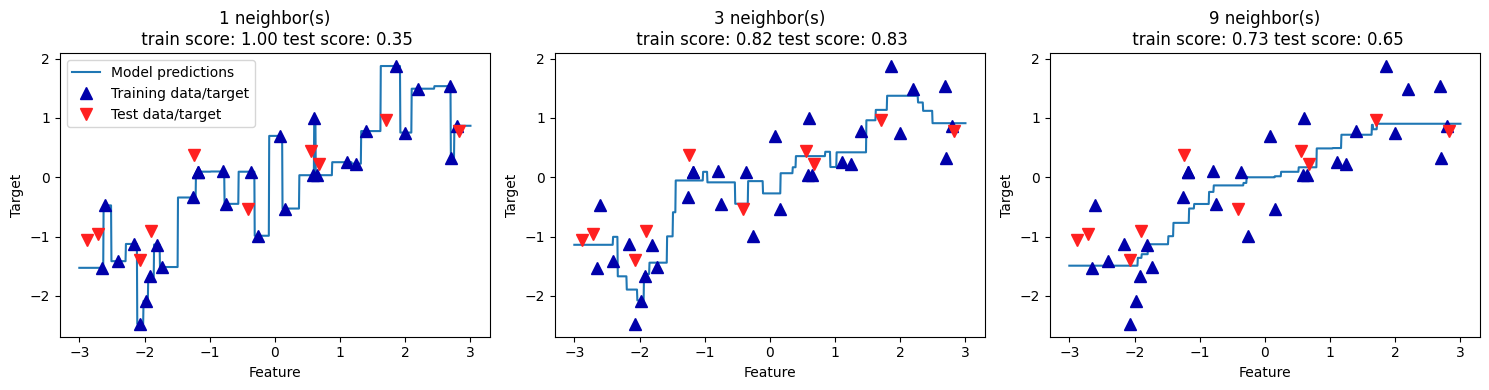

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.tight_layout()

The three panels show predictions (blue curves) for $k = 1, 3, 9$:

- **$k=1$**: The prediction curve passes through every training point (triangles), resulting in a jagged curve. Training score is 1.0 (perfect fit), but the test score is lower.
- **$k=3$**: A smoother curve that still follows the general trend. This gives the best balance between training and test performance.
- **$k=9$**: A very smooth curve that misses local details. The training score drops noticeably because the model cannot capture fine-grained patterns.

This is the same overfitting-underfitting trade-off we saw in classification: $k=1$ overfits, $k=9$ underfits, and $k=3$ strikes a reasonable balance.

### 4.3 k-NN: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Key Parameters** | `n_neighbors` ($k$), distance metric (default: Euclidean) |
| **Strengths** | Easy to understand, no training phase, good baseline |
| **Weaknesses** | Slow prediction on large datasets, poor with many features or sparse data |

In practice, k-NN is often used as a baseline but rarely as a final model. Its main limitation is that prediction requires scanning the entire training set, which becomes expensive for large datasets. It also suffers in high dimensions because distances become less meaningful (the "curse of dimensionality").

**Tip**: Always preprocess and scale your features before using k-NN, since Euclidean distance is sensitive to feature scales.

## 5. Linear Models

Linear models make predictions using a linear (weighted sum) function of the input features:

$$\hat{y} = w_0 x_0 + w_1 x_1 + \cdots + w_p x_p + b = \mathbf{w}^\top \mathbf{x} + b$$

where:
- $\mathbf{w} = [w_0, w_1, \ldots, w_p]$ are the **weights** (coefficients), one per feature
- $b$ is the **intercept** (bias term)
- $\hat{y}$ is the prediction

For a single feature, this reduces to the equation of a straight line: $\hat{y} = w_0 x_0 + b$, where $w_0$ is the slope and $b$ is the y-intercept.

For two features, the prediction surface is a plane. In higher dimensions, it is a **hyperplane**. Despite their simplicity, linear models are surprisingly powerful when the number of features is large.

### 5.1 Linear Regression (Ordinary Least Squares)

Linear regression finds the weights $\mathbf{w}$ and intercept $b$ that minimize the **mean squared error (MSE)** between predictions and true targets on the training set:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{w}^\top \mathbf{x}_i - b)^2$$

This has a closed-form solution (the normal equation), so no iterative optimization is needed. Linear regression has no hyperparameters to tune, which is both a benefit (simplicity) and a limitation (no way to control model complexity).

w[0]: 0.393906  b: -0.031804


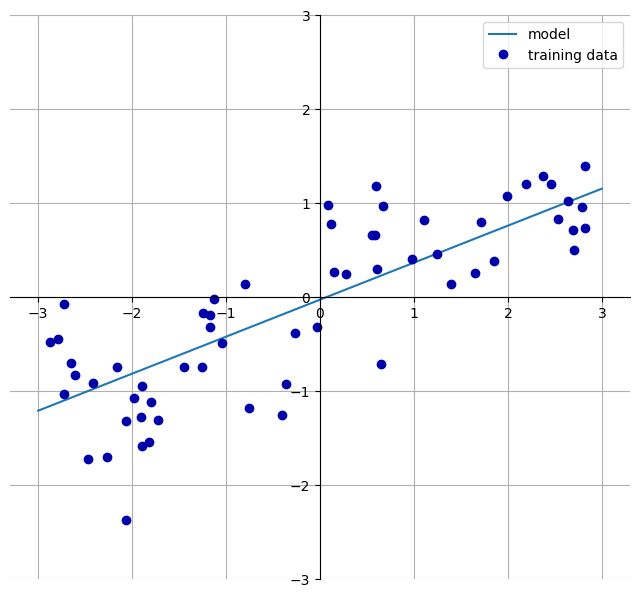

In [16]:
mglearn.plots.plot_linear_regression_wave()

The output shows $w_0 \approx 0.394$ and $b \approx -0.032$. The learned model is:

$$\hat{y} = 0.394 \cdot x + (-0.032)$$

The slope of approximately 0.4 is visible in the plot as a moderately upward-tilting line. The intercept is close to zero, meaning the line crosses the y-axis just below the origin.

In [17]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("\nTraining set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746

Training set score: 0.67
Test set score: 0.66


The learned coefficient `lr.coef_ = [0.394]` and intercept `lr.intercept_ = -0.032` confirm the values from the plot.

The $R^2$ scores are:
- Training set: 0.67
- Test set: 0.66

The training and test scores are nearly identical, which indicates the model is **not overfitting**. However, both scores are relatively low (0.67 means the model explains only 67% of the variance). This suggests the model is **underfitting** -- a single straight line cannot capture the nonlinear pattern in the wave dataset.

Note: scikit-learn stores all attributes derived from training data with a trailing underscore (e.g., `coef_`, `intercept_`) to distinguish them from user-set parameters.

#### Linear Regression on the Extended Boston Housing Dataset

With 104 features (including interactions), linear regression has much more flexibility. Let us see whether this leads to better performance -- or overfitting.

In [18]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Results:
- Training set $R^2$: **0.95**
- Test set $R^2$: **0.61**

The large gap between training and test performance (0.95 vs. 0.61) is a clear sign of **overfitting**. The model has 104 features but only 506 samples -- more than enough degrees of freedom to memorize the training set without learning generalizable patterns.

This is precisely the situation where **regularization** is needed: we want to constrain the model so that it cannot rely too heavily on any individual feature.

### 5.2 Ridge Regression (L2 Regularization)

Ridge regression uses the same prediction formula as ordinary least squares, but adds a penalty on the size of the coefficients. The optimization objective becomes:

$$\min_{\mathbf{w}, b} \left[ \frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{w}^\top \mathbf{x}_i - b)^2 + \alpha \sum_{j=1}^{p} w_j^2 \right]$$

The first term is the usual MSE (data fidelity). The second term is the **L2 penalty** -- it discourages large coefficient values by penalizing the sum of their squares. The hyperparameter $\alpha$ controls the trade-off:

- **Large $\alpha$**: Strong regularization. Coefficients are pushed toward zero, yielding a simpler model.
- **Small $\alpha$**: Weak regularization. The model behaves more like ordinary least squares.
- **$\alpha = 0$**: No regularization. Equivalent to ordinary least squares.

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


With the default $\alpha = 1.0$:
- Training set $R^2$: **0.89** (lower than OLS's 0.95)
- Test set $R^2$: **0.75** (higher than OLS's 0.61)

The regularization penalty reduced training performance (the model is more restricted) but significantly **improved generalization**. This is the expected behavior: Ridge trades training accuracy for better test accuracy by preventing the coefficients from growing too large.

#### Effect of Alpha on Ridge

In [20]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("  Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("  Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nRidge alpha=0.1")
print("  Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("  Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge alpha=10
  Training set score: 0.79
  Test set score: 0.64

Ridge alpha=0.1
  Training set score: 0.93
  Test set score: 0.77


Summary of Ridge results on the extended Boston Housing dataset:

| $\alpha$ | Train $R^2$ | Test $R^2$ | Interpretation |
|----------|-------------|------------|----------------|
| 10       | 0.79        | 0.64       | Too much regularization -- underfitting |
| 1 (default) | 0.89     | 0.75       | Good balance |
| 0.1      | 0.93        | 0.77       | Best test score -- slight regularization |

At $\alpha = 10$, the model is too constrained and underfits. At $\alpha = 0.1$, the model is flexible enough to fit the data well while still benefiting from regularization. The optimal $\alpha$ depends on the dataset and is typically found via cross-validation (Chapter 5).

#### Comparing Coefficient Magnitudes

We can visualize how the regularization strength affects the learned coefficients. Each point in the plot represents one of the 104 coefficients.

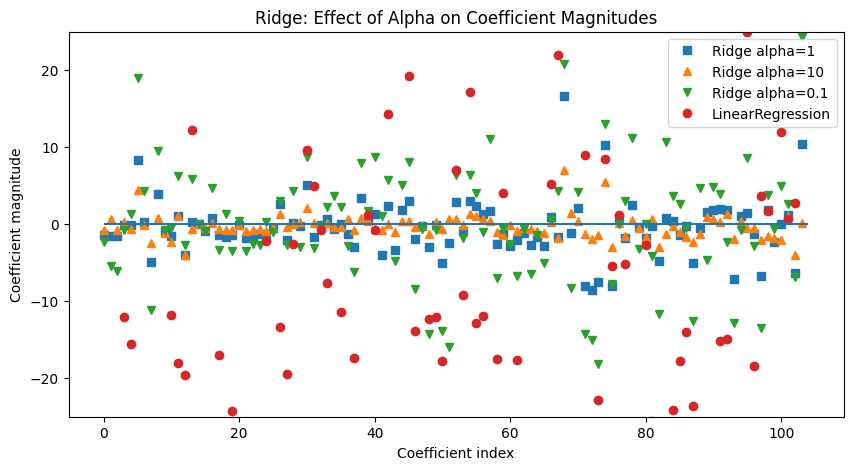

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.title("Ridge: Effect of Alpha on Coefficient Magnitudes")
plt.show()

Key observations:

- **$\alpha = 10$** (triangles): Coefficients are tightly concentrated near zero, mostly between -3 and 3.
- **$\alpha = 1$** (squares): Coefficients are somewhat larger but still constrained.
- **$\alpha = 0.1$** (v-markers): Coefficients are larger, approaching OLS behavior.
- **OLS** (circles): Many coefficients are very large (some extend beyond the plot limits of $\pm25$).

This confirms that increasing $\alpha$ shrinks the coefficients toward zero. The L2 penalty never sets coefficients to exactly zero -- it only makes them small.

#### Learning Curves: Ridge vs. Linear Regression

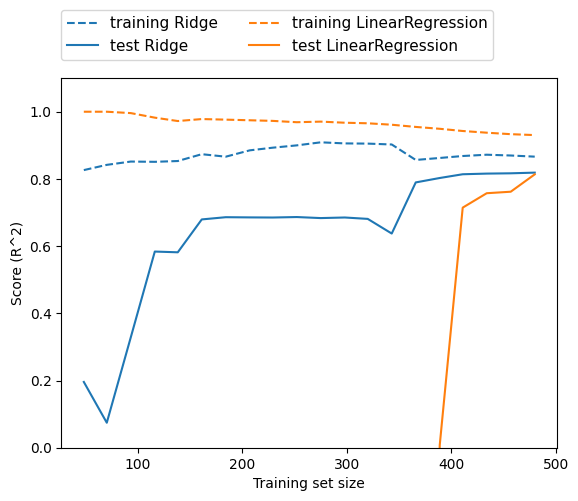

In [22]:
mglearn.plots.plot_ridge_n_samples()

The learning curves show how training and test performance change as the number of training samples increases.

Key observations:

- With **fewer than 400 samples**, OLS essentially learns nothing useful (test score near zero or negative), while Ridge maintains reasonable performance thanks to regularization.
- As the number of training samples grows, both models improve, and OLS eventually catches up with Ridge.
- The training score for OLS decreases with more data because it becomes harder to memorize a larger dataset.

**Lesson**: Regularization is most valuable when data is scarce. With enough data, even unregularized models can perform well because there is enough information to constrain the coefficients naturally.

### 5.3 Lasso (L1 Regularization)

Lasso also adds a penalty to the ordinary least squares objective, but uses the **L1 norm** (sum of absolute values) instead of the L2 norm:

$$\min_{\mathbf{w}, b} \left[ \frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{w}^\top \mathbf{x}_i - b)^2 + \alpha \sum_{j=1}^{p} |w_j| \right]$$

The critical difference from Ridge: the L1 penalty drives some coefficients to **exactly zero**. This means Lasso performs **automatic feature selection** -- irrelevant features are effectively removed from the model. The result is a sparser, more interpretable model.

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


With the default $\alpha = 1.0$:
- Training $R^2$: **0.29**
- Test $R^2$: **0.21**
- Features used: **4** out of 105

The model is severely **underfitting**. The default $\alpha$ is too strong -- it has zeroed out 101 of the 105 coefficients, leaving only 4 features. The model is too simple to capture the underlying patterns.

In [24]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=0.01")
print("  Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("  Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("  Number of features used:", np.sum(lasso001.coef_ != 0))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("\nLasso alpha=0.0001")
print("  Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("  Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("  Number of features used:", np.sum(lasso00001.coef_ != 0))

Lasso alpha=0.01
  Training set score: 0.90
  Test set score: 0.77
  Number of features used: 33

Lasso alpha=0.0001
  Training set score: 0.95
  Test set score: 0.64
  Number of features used: 96


Summary of Lasso results:

| $\alpha$ | Train $R^2$ | Test $R^2$ | Features Used | Interpretation |
|----------|-------------|------------|---------------|----------------|
| 1.0      | 0.29        | 0.21       | 4 / 105       | Severe underfitting |
| 0.01     | 0.90        | 0.77       | 33 / 105      | Good balance -- comparable to Ridge |
| 0.0001   | 0.95        | 0.64       | 96 / 105      | Too little regularization -- overfitting |

At $\alpha = 0.01$, Lasso achieves performance comparable to the best Ridge result (test $R^2 = 0.77$), but using only 33 features instead of all 105. This makes the model easier to interpret.

At $\alpha = 0.0001$, almost all features are included and the model resembles unregularized OLS -- overfitting returns.

#### Comparing Lasso and Ridge Coefficients

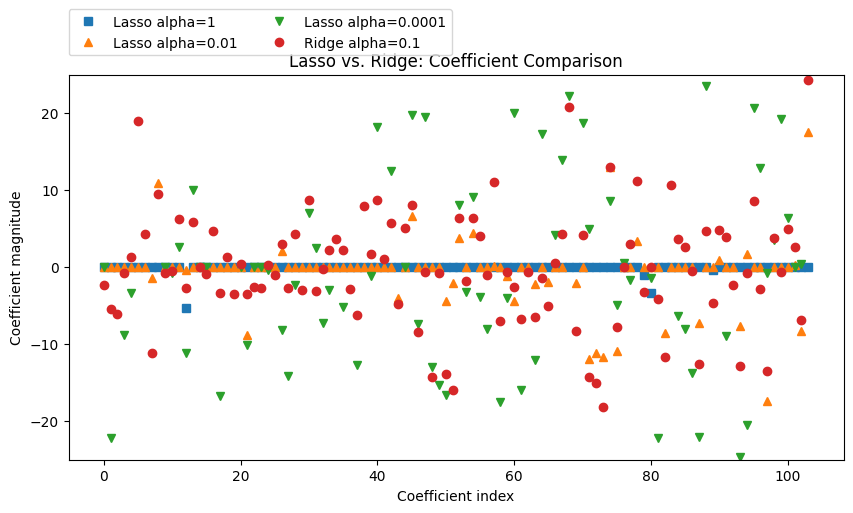

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Lasso vs. Ridge: Coefficient Comparison")
plt.show()

The plot illustrates the fundamental difference between L1 and L2 regularization:

- **Lasso $\alpha=1$** (squares): Most coefficients are exactly zero. Only 4 features survive.
- **Lasso $\alpha=0.01$** (triangles): More features are active, but many remain at zero.
- **Lasso $\alpha=0.0001$** (v-markers): Nearly all features are active with large magnitudes -- weak regularization.
- **Ridge $\alpha=0.1$** (circles): All coefficients are nonzero. Ridge shrinks but never eliminates features.

This is the key distinction: Ridge distributes weight across all features, while Lasso concentrates weight on a subset and discards the rest.

### Ridge vs. Lasso: When to Use Which?

| | Ridge (L2) | Lasso (L1) |
|---|-----------|-----------|
| **Penalty term** | $\alpha \sum w_j^2$ | $\alpha \sum |w_j|$ |
| **Coefficients** | Small but nonzero | Many exactly zero |
| **Feature selection** | No -- uses all features | Yes -- automatic |
| **Interpretability** | Harder (all features involved) | Easier (sparse model) |
| **Default choice** | Usually the first to try | When you expect few relevant features |

**Practical guidelines**:
- Start with Ridge regression. It is more stable and works well in most settings.
- Use Lasso if you have many features and expect only a few to be truly important, or if you need an interpretable model.
- **ElasticNet** combines both L1 and L2 penalties: $\alpha_1 \sum |w_j| + \alpha_2 \sum w_j^2$. It often works best in practice, at the cost of having two hyperparameters to tune.

### 5.4 Linear Models for Classification

For classification, the linear model computes the same weighted sum, but applies a **threshold** to make a binary decision:

$$\hat{y} = \text{sign}(\mathbf{w}^\top \mathbf{x} + b) = \begin{cases} +1 & \text{if } \mathbf{w}^\top \mathbf{x} + b > 0 \\ -1 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0 \end{cases}$$

The **decision boundary** is the set of points where $\mathbf{w}^\top \mathbf{x} + b = 0$. In 2D, this is a straight line. In higher dimensions, it is a hyperplane.

Two widely used algorithms:

- **Logistic Regression** (`LogisticRegression`): Despite the name, this is a classification algorithm. It models the probability that a sample belongs to the positive class using the logistic (sigmoid) function:

$$P(y=1 | \mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}$$

- **Linear Support Vector Machine** (`LinearSVC`): Finds the hyperplane that maximizes the margin between the two classes.

Both use L2 regularization by default, controlled by the parameter `C` (not `alpha`). Note the inverse relationship: **larger C = less regularization** (opposite of `alpha` in Ridge/Lasso).

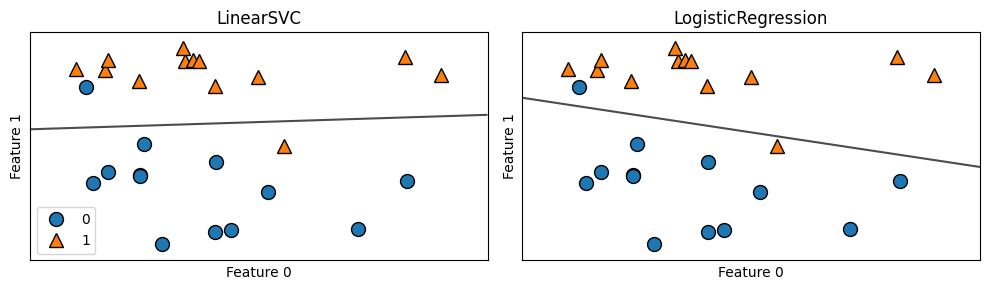

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.tight_layout()

Both models produce linear (straight-line) decision boundaries that separate the two classes. The boundaries are slightly different because the algorithms optimize different loss functions, but the overall results are similar. Both misclassify two points -- a straight line cannot perfectly separate these overlapping classes.

#### Effect of Regularization Parameter C

The parameter `C` controls regularization strength for `LogisticRegression` and `LinearSVC`:

- **Small C**: Strong regularization. The model prioritizes keeping coefficients small (simple model) and may misclassify some training points.
- **Large C**: Weak regularization. The model tries to classify every training point correctly, even if it means a more complex decision boundary.

Note: `C` is the inverse of `alpha`. Specifically, `C = 1/alpha`. So increasing `C` has the same effect as decreasing `alpha`.

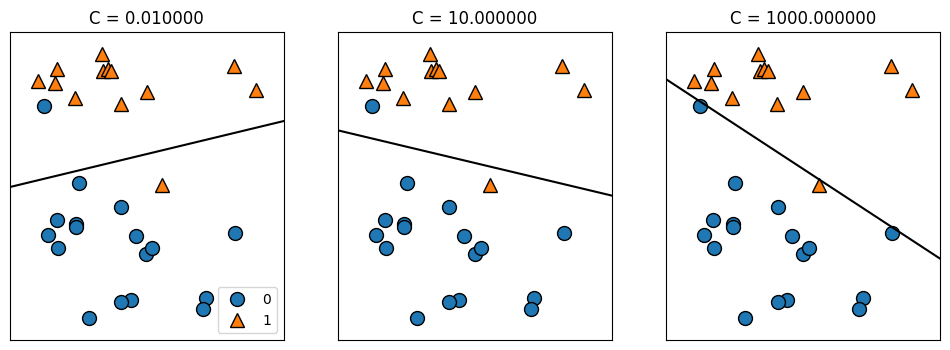

In [27]:
mglearn.plots.plot_linear_svc_regularization()

The three panels show the decision boundary for increasing values of C:

- **Left (small C)**: The boundary is nearly horizontal, fitting the overall trend but misclassifying two points. The model is simple and robust.
- **Center (medium C)**: The boundary tilts to accommodate the misclassified points.
- **Right (large C)**: The boundary tilts further, correctly classifying all Class 0 points but still missing one Class 1 point. The model is more complex and potentially overfitting.

This illustrates the regularization-accuracy trade-off: more regularization (smaller C) yields smoother boundaries, while less regularization (larger C) chases individual data points.

#### Logistic Regression on the Breast Cancer Dataset

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("C=1 (default)")
print("  Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("  Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("\nC=100")
print("  Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("  Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("\nC=0.01")
print("  Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("  Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

C=1 (default)
  Training set score: 0.958
  Test set score: 0.958

C=100
  Training set score: 0.979
  Test set score: 0.965

C=0.01
  Training set score: 0.953
  Test set score: 0.951


Results for Logistic Regression on the Breast Cancer dataset (30 features):

| C | Train Accuracy | Test Accuracy | Interpretation |
|---|----------------|---------------|----------------|
| 1 (default) | 0.958 | 0.958 | Train and test are nearly identical -- possible underfitting |
| 100 | 0.979 | 0.965 | Slightly better -- less regularization helps |
| 0.01 | 0.953 | 0.951 | More regularization -- slightly worse but still good |

With C=1, the identical training and test scores suggest the model could benefit from more flexibility. Increasing C to 100 improves both training and test accuracy, confirming mild underfitting at the default setting. Decreasing C to 0.01 slightly reduces performance, as expected with stronger regularization.

#### Visualizing Coefficient Magnitudes (L2 Regularization)

Each point in the plot represents one of the 30 feature coefficients. The sign of a coefficient indicates which class that feature is associated with, and the magnitude indicates the strength of the association.

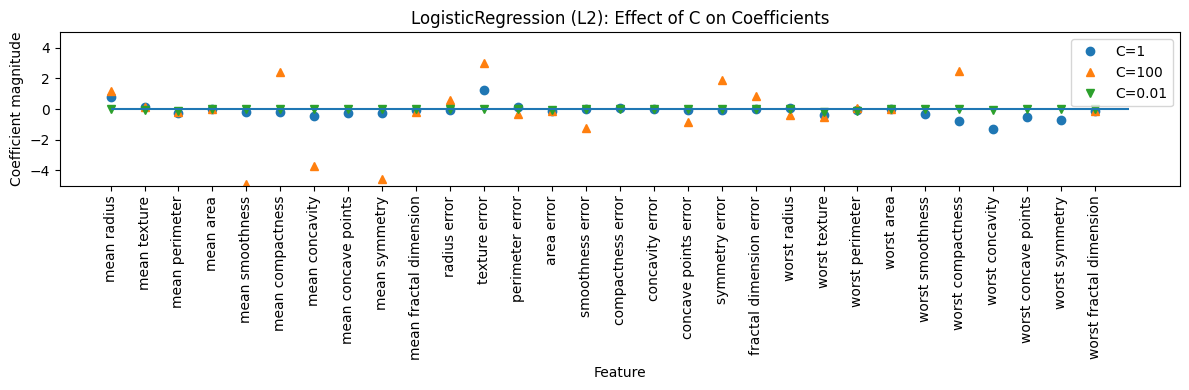

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.title("LogisticRegression (L2): Effect of C on Coefficients")
plt.tight_layout()

The plot shows how regularization strength affects the learned coefficients:

- **C=100** (triangles): Large coefficients -- the model is relatively unconstrained.
- **C=1** (circles): Moderate coefficients.
- **C=0.01** (v-markers): Small coefficients -- strong regularization pushes them toward zero.

An important caveat: the sign of a coefficient can flip depending on C. For example, the "mean perimeter" coefficient is negative for C=100 and C=1, but positive for C=0.01. This means we cannot simply say "high mean perimeter indicates malignant" -- the interpretation depends on the regularization setting. Coefficient interpretations in linear models should always be taken with caution, especially when features are correlated.

#### L1 Regularization for More Interpretable Models

By switching to L1 regularization (`penalty="l1"`), we can produce sparse models where many coefficients are exactly zero. This makes it easier to identify which features the model considers most important.

Training accuracy of L1 logreg with C=0.001: 0.91
Test accuracy of L1 logreg with C=0.001: 0.92
Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of L1 logreg with C=1.000: 0.96
Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of L1 logreg with C=100.000: 0.98


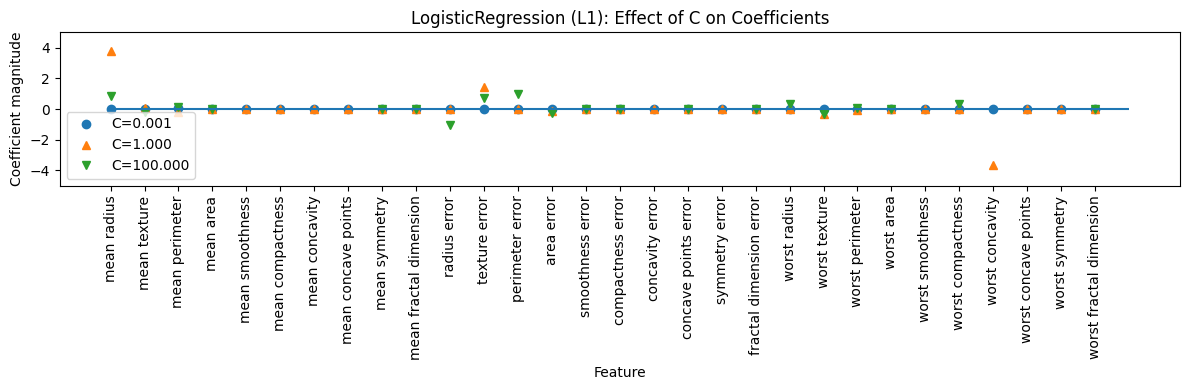

In [30]:
plt.figure(figsize=(12, 4))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear",
                                max_iter=10000).fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.title("LogisticRegression (L1): Effect of C on Coefficients")
plt.tight_layout()

Results with L1-regularized Logistic Regression:

| C | Train Accuracy | Test Accuracy | Nonzero Coefficients |
|---|----------------|---------------|---------------------|
| 0.001 | 0.91 | 0.92 | Very few features used |
| 1.0 | 0.96 | 0.96 | Moderate sparsity |
| 100.0 | 0.99 | 0.98 | Most features used |

Observations from the coefficient plot:

- **C=0.001**: Only a handful of features have nonzero coefficients. The model is highly sparse and interpretable, but the accuracy is somewhat lower.
- **C=1**: A moderate number of features are active. Good balance between sparsity and performance.
- **C=100**: Most features are active with larger magnitudes. The model is approaching unregularized behavior.

Compared to L2 regularization, L1 provides clearer feature selection: you can directly see which features the model relies on. This is particularly useful when you need to explain the model's predictions to domain experts.

## 6. Linear Models for Multiclass Classification

Many linear classifiers are inherently binary. The **one-vs.-rest (OvR)** approach extends them to handle multiple classes:

1. For each class $c$, train a binary classifier that separates class $c$ from all other classes.
2. This produces one coefficient vector $\mathbf{w}_c$ and one intercept $b_c$ per class.
3. At prediction time, compute the confidence score for each class:

$$f_c(\mathbf{x}) = \mathbf{w}_c^\top \mathbf{x} + b_c$$

4. Assign the class with the highest score: $\hat{y} = \arg\max_c \, f_c(\mathbf{x})$.

With $k$ classes, this results in $k$ binary classifiers, each with its own decision boundary.

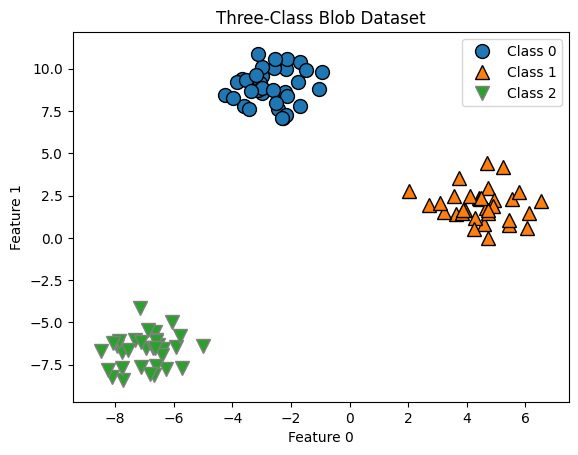

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.title("Three-Class Blob Dataset")
plt.show()

The dataset contains three classes generated from Gaussian distributions, each forming a distinct cluster in 2D space. The clusters have some overlap, making this a non-trivial classification problem even for linear models.

In [32]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


The coefficient matrix has shape `(3, 2)`: three rows (one per class) and two columns (one per feature). Each row $\mathbf{w}_c$ defines a linear boundary for one binary classifier. The intercept vector has shape `(3,)`, one intercept per class.

In general, for a problem with $k$ classes and $p$ features, `coef_` has shape $(k, p)$ and `intercept_` has shape $(k,)$.

Each row of `coef_` defines a line in 2D. The decision boundary for class $c$ is the line where:

$$w_{c,0} \cdot x_0 + w_{c,1} \cdot x_1 + b_c = 0$$

Points on the "positive" side of this line ($f_c > 0$) are classified as class $c$ by that binary classifier.

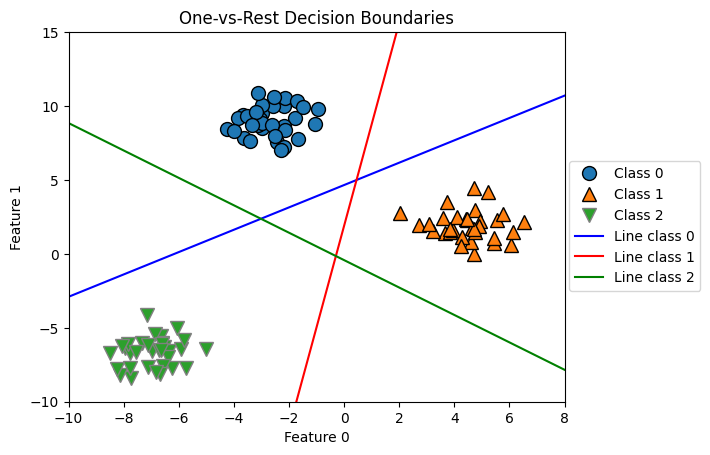

In [33]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.title("One-vs-Rest Decision Boundaries")
plt.show()

Each colored line represents one binary classifier's decision boundary. For example, the blue line separates "Class 0 vs. rest." Points above this line are on the Class 0 side, and points below are on the "rest" side.

Notice the triangular region in the center where all three classifiers say "rest." A point falling there is assigned to whichever classifier gives the highest confidence score -- effectively, the class whose line is closest.

#### Full 2D Decision Regions

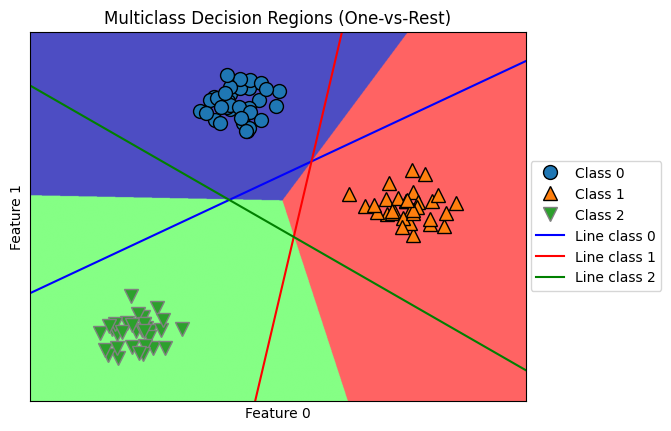

In [34]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Multiclass Decision Regions (One-vs-Rest)")
plt.show()

The colored regions show the final prediction for every point in the plane. The boundaries between regions are piecewise linear -- each boundary segment comes from one of the three binary classifiers. The ambiguous triangle from the previous plot is now resolved: each point is assigned to the class with the highest confidence score.

### Linear Models: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Key parameters** | `alpha` (regression), `C` (classification) -- search on a logarithmic scale |
| **Regularization** | L1 for feature selection and interpretability; L2 as the default |
| **Strengths** | Very fast to train and predict, scales to very large datasets, works well with sparse data |
| **Weaknesses** | Limited flexibility in low dimensions, correlated features make coefficients hard to interpret |
| **Scalability** | Use `solver='sag'` for large datasets; `SGDClassifier`/`SGDRegressor` for even larger ones |

**Method chaining**: scikit-learn's `fit()` returns `self`, so you can write `model.fit(X, y).predict(X_test)` in one line. This is convenient but can reduce readability if overused.

## 7. Naive Bayes Classifiers

Naive Bayes classifiers are based on Bayes' theorem with the "naive" assumption that all features are **conditionally independent** given the class label:

$$P(y \mid x_1, \ldots, x_p) \propto P(y) \prod_{j=1}^{p} P(x_j \mid y)$$

The model learns per-class statistics for each feature independently during training. Despite the strong independence assumption (which is rarely true in practice), Naive Bayes often works surprisingly well, especially for text classification.

Three variants are implemented in scikit-learn:

| Variant | Feature Assumption | Learns | Best For |
|---------|-------------------|--------|----------|
| **GaussianNB** | Continuous (Gaussian) | Mean and std per feature per class | General continuous data |
| **BernoulliNB** | Binary (0/1) | Frequency of nonzero entries per class | Text (word presence) |
| **MultinomialNB** | Counts (non-negative integers) | Average value per feature per class | Text (word counts, TF-IDF) |

#### BernoulliNB Example: Counting Non-Zero Features Per Class

In [35]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


The output shows the count of nonzero entries for each feature, grouped by class:

- **Class 0** (samples 0 and 2): `[0, 1, 0, 2]` -- Feature 0 is never nonzero, Feature 1 is nonzero once, Feature 2 is never nonzero, Feature 3 is nonzero twice.
- **Class 1** (samples 1 and 3): `[2, 0, 2, 1]` -- Feature 0 is always nonzero, Feature 1 is never nonzero, Feature 2 is always nonzero, Feature 3 is nonzero once.

These counts (normalized to probabilities) are the learned parameters. To classify a new sample, BernoulliNB computes the posterior probability for each class based on which features are nonzero, and predicts the class with the highest probability. The resulting prediction formula has the same linear form as in logistic regression, though the coefficients have a different interpretation.

### Naive Bayes: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Key parameter** | `alpha` -- smoothing parameter (Laplace smoothing) |
| **Strengths** | Even faster than linear models, works well on high-dimensional sparse data |
| **Weaknesses** | Often slightly less accurate than linear classifiers like Logistic Regression |
| **Best use** | Baseline models, very large datasets, text classification |

The smoothing parameter `alpha` adds $\alpha$ virtual data points with positive values for all features. This prevents zero probabilities for features not seen during training. Larger `alpha` means more smoothing and a simpler model. The default `alpha=1` works well in most cases.

## 8. Decision Trees

Decision trees learn a hierarchy of if/else questions (called **tests** or **splits**) to make predictions. Each internal node contains a test on a single feature, each branch represents the outcome of the test, and each leaf node contains a prediction.

The process is analogous to a game of 20 Questions: the algorithm asks the most informative question at each step to narrow down the answer as quickly as possible.

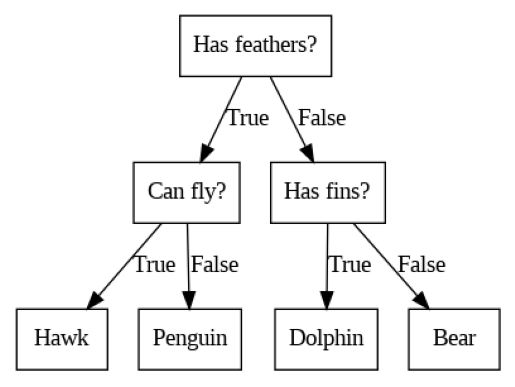

In [36]:
mglearn.plots.plot_animal_tree()

This tree distinguishes four animals using three binary features. Starting from the root, each question splits the remaining possibilities in half. With three questions, we can distinguish up to $2^3 = 8$ categories. The key insight is that good questions (those that split the data most evenly) lead to shorter, more efficient trees.

### 8.1 Building Decision Trees

The tree-building algorithm works recursively:

1. Consider all possible tests of the form "Is feature $j$ larger than threshold $t$?"
2. Select the test that produces the most **informative** split -- typically measured by **Gini impurity** or **information gain** (entropy reduction).
3. Split the data into two subsets based on the selected test.
4. Repeat recursively on each subset until a stopping criterion is met.

**Gini impurity** for a node with classes $1, \ldots, K$:

$$G = 1 - \sum_{k=1}^{K} p_k^2$$

where $p_k$ is the proportion of samples belonging to class $k$ in that node. A pure node (all samples from one class) has $G = 0$. The algorithm chooses the split that maximally reduces the weighted average Gini impurity across the two child nodes.

Since each test involves only one feature and one threshold, the resulting decision regions always have **axis-parallel boundaries** (rectangles in 2D).

### 8.2 Controlling Complexity (Pre-Pruning)

A fully grown tree (where every leaf is pure) achieves 100% training accuracy. But it memorizes the training data, including noise and outliers, leading to severe overfitting.

**Pre-pruning** stops the tree from growing too deep. Common strategies:

- `max_depth` -- limit the maximum number of consecutive splits
- `max_leaf_nodes` -- limit the total number of leaf nodes
- `min_samples_leaf` -- require a minimum number of samples in each leaf

Picking one of these is usually sufficient to prevent overfitting. scikit-learn does not implement post-pruning (removing nodes after the tree is built).

#### Unpruned Tree on Breast Cancer Dataset

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Results for the unpruned tree:
- Training accuracy: **1.000** (100%)
- Test accuracy: **0.937**

As expected, the unpruned tree perfectly memorizes the training data. The gap between training (100%) and test (93.7%) accuracy indicates overfitting. The tree has grown deep enough to create a pure leaf for every training sample, including noisy or atypical ones.

With 100% training accuracy, the tree is clearly overfitting. Let us apply pre-pruning by limiting the depth to 4:

In [38]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Results with `max_depth=4`:
- Training accuracy: **0.988** (slightly below 100%)
- Test accuracy: **0.951** (improved from 0.937)

Limiting the tree depth reduced training accuracy by only 1.2%, but improved test accuracy by 1.4%. The pruned tree generalizes better because it cannot memorize every detail of the training data. With only 4 levels of splits, the tree captures the most important patterns while ignoring noise.

### 8.3 Visualizing the Decision Tree

The `export_graphviz` function renders the tree structure. Each node shows the feature test, the number of samples, and the class distribution. Nodes are colored by the majority class -- darker colors indicate higher purity.

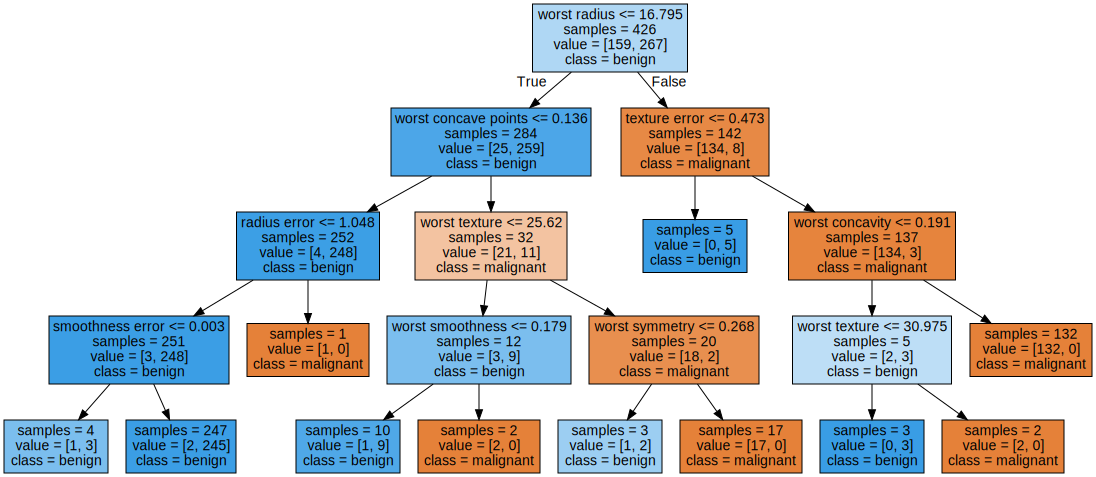

In [39]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

The tree visualization reveals that the very first split on "worst radius <= 16.795" already separates the data quite well. Following the right branch (worst radius > 16.795), we find a node with 134 malignant and only 8 benign samples. Most of the subsequent splits on this side serve to isolate those 8 benign samples.

On the left branch (worst radius <= 16.795), 259 of 284 samples are benign. A few more splits further refine the classification. This confirms that "worst radius" is by far the most important feature for this dataset.

### 8.4 Feature Importance

Feature importance quantifies how much each feature contributes to the tree's decisions. It is computed based on how much each feature reduces the impurity (Gini or entropy) across all nodes where it is used, weighted by the number of samples reaching that node.

Properties:
- Values range from 0 (not used) to 1 (perfectly predicts the target).
- All feature importances sum to 1.
- A feature with importance 0 was never selected for any split.

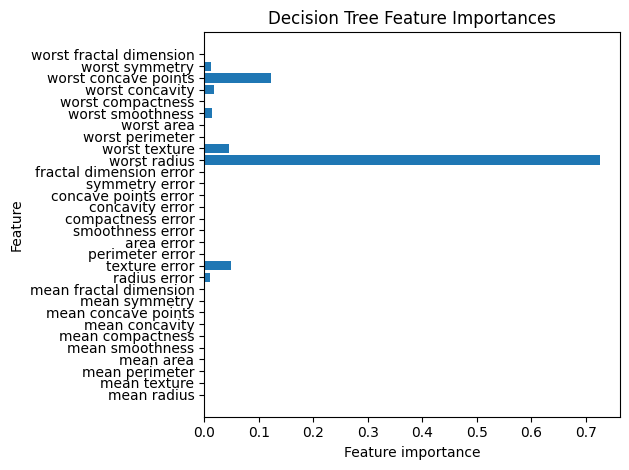

In [40]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)
plt.title("Decision Tree Feature Importances")
plt.tight_layout()

The plot confirms that "worst radius" dominates with an importance of about 0.73. The next most important features are "worst concave points" (~0.12) and "worst texture" (~0.05). Most of the 30 features have zero importance -- they were never used in any split.

However, zero importance does not mean a feature is uninformative. It may simply be redundant with a feature the tree already selected. For example, "worst perimeter" is highly correlated with "worst radius," so the tree never needs to use it.

An important caveat: unlike linear model coefficients, feature importances are always **positive** and do not indicate the direction of the relationship. They tell us that "worst radius" is important, but not whether a high or low value is associated with malignant tumors.

Furthermore, the relationship between a feature and the target may not be monotonic, as the following example demonstrates:

Feature importances: [0. 1.]


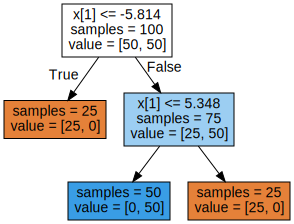

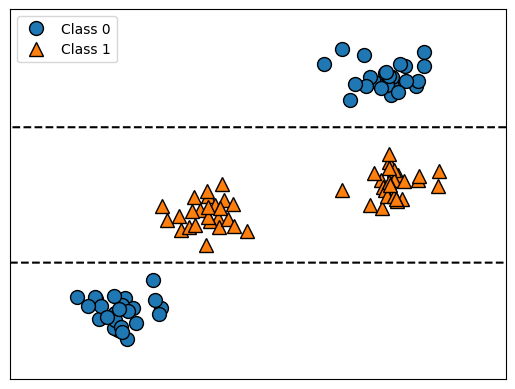

In [41]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The output shows `Feature importances: [0. 1.]`, meaning all predictive power comes from Feature 1 (the y-axis). But looking at the plot, the relationship is non-monotonic: both very low and very high values of Feature 1 correspond to Class 0, while intermediate values correspond to Class 1. A single threshold cannot capture this -- the tree needs multiple splits on the same feature at different thresholds.

### 8.5 Decision Trees Cannot Extrapolate

A critical limitation of all tree-based models: they can only predict values **within the range observed during training**. For regression, the prediction for any input outside the training range is simply the target value of the nearest training region.

This means trees are fundamentally unable to learn trends that extend beyond the training data.

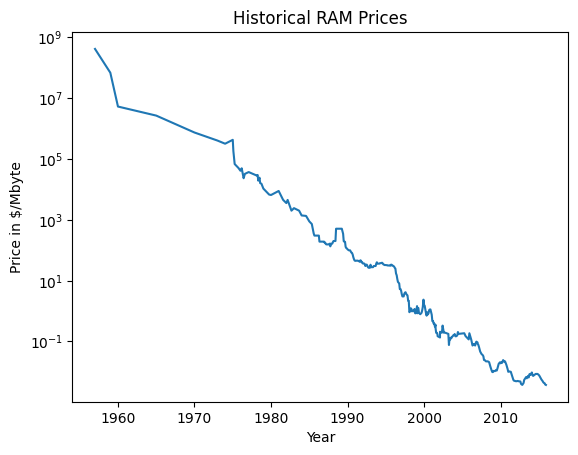

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

ram_prices = pd.read_csv("ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.title("Historical RAM Prices")
plt.show()

The RAM price data shows an approximately log-linear decline over time. On the log scale, the relationship looks close to a straight line, which should be easy for a linear model to capture.

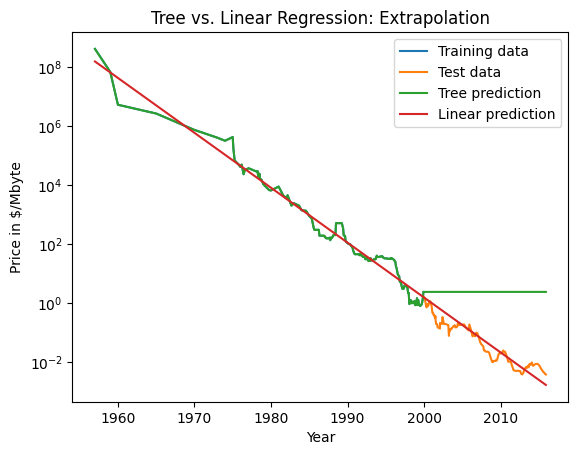

In [43]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train_ram = data_train.date.values[:, np.newaxis]
y_train_ram = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train_ram, y_train_ram)
linear_reg = LinearRegression().fit(X_train_ram, y_train_ram)

X_all = ram_prices.date.values[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.title("Tree vs. Linear Regression: Extrapolation")
plt.show()

The comparison is striking:

- **Linear Regression** (green line): Extrapolates the downward trend beyond the year 2000, producing reasonable (though imperfect) price forecasts.
- **Decision Tree** (red line): Perfectly fits the training data (before 2000), but for all dates after 2000, it predicts the same constant value -- the last known price from the training set. It cannot generate any prediction outside the range it has seen.

This inability to extrapolate applies to all tree-based models, including Random Forests and Gradient Boosting. It is especially problematic for time-series forecasting or any task where the test data may lie outside the training distribution.

### Decision Trees: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Strengths** | Easy to visualize and explain, no feature scaling needed, handles mixed feature types |
| **Weaknesses** | Prone to overfitting, poor generalization, cannot extrapolate |
| **Key params** | `max_depth`, `max_leaf_nodes`, `min_samples_leaf` |
| **Invariances** | Completely invariant to feature scaling (splits depend only on ordering, not magnitude) |

In practice, single decision trees are rarely used as final models. Their main value is interpretability and as building blocks for ensemble methods.

## 9. Ensembles of Decision Trees

The idea behind ensembles is to combine multiple models to produce a more powerful one. Two ensemble methods based on decision trees have proven especially effective:

- **Random Forests**: Build many trees independently, then average their predictions.
- **Gradient Boosting**: Build trees sequentially, where each new tree corrects the errors of the previous ones.

Both methods address the main weakness of single decision trees -- overfitting -- while retaining their strengths.

### 9.1 Random Forests

A random forest builds $T$ decision trees, each trained on a slightly different version of the data. Two sources of randomness ensure the trees are diverse:

1. **Bootstrap sampling**: Each tree is trained on a random sample of $n$ data points drawn *with replacement* from the original $n$ samples. About one-third of the data is left out of each tree's training set.

2. **Feature subsampling**: At each split, only a random subset of $m$ features (out of $p$ total) is considered. The best split among these $m$ features is selected.

The default value is $m = \sqrt{p}$ for classification and $m = \log_2(p)$ for regression.

**Prediction**:
- Classification: Each tree votes for a class. The class with the most votes (or highest average probability) wins.
- Regression: The predictions of all trees are averaged.

The mathematical justification: if the individual trees have errors that are somewhat uncorrelated (due to the randomization), averaging reduces the variance of the ensemble without increasing bias.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

We trained a random forest with only 5 trees on the two_moons dataset. Each tree is stored in `forest.estimators_` and can be inspected individually.

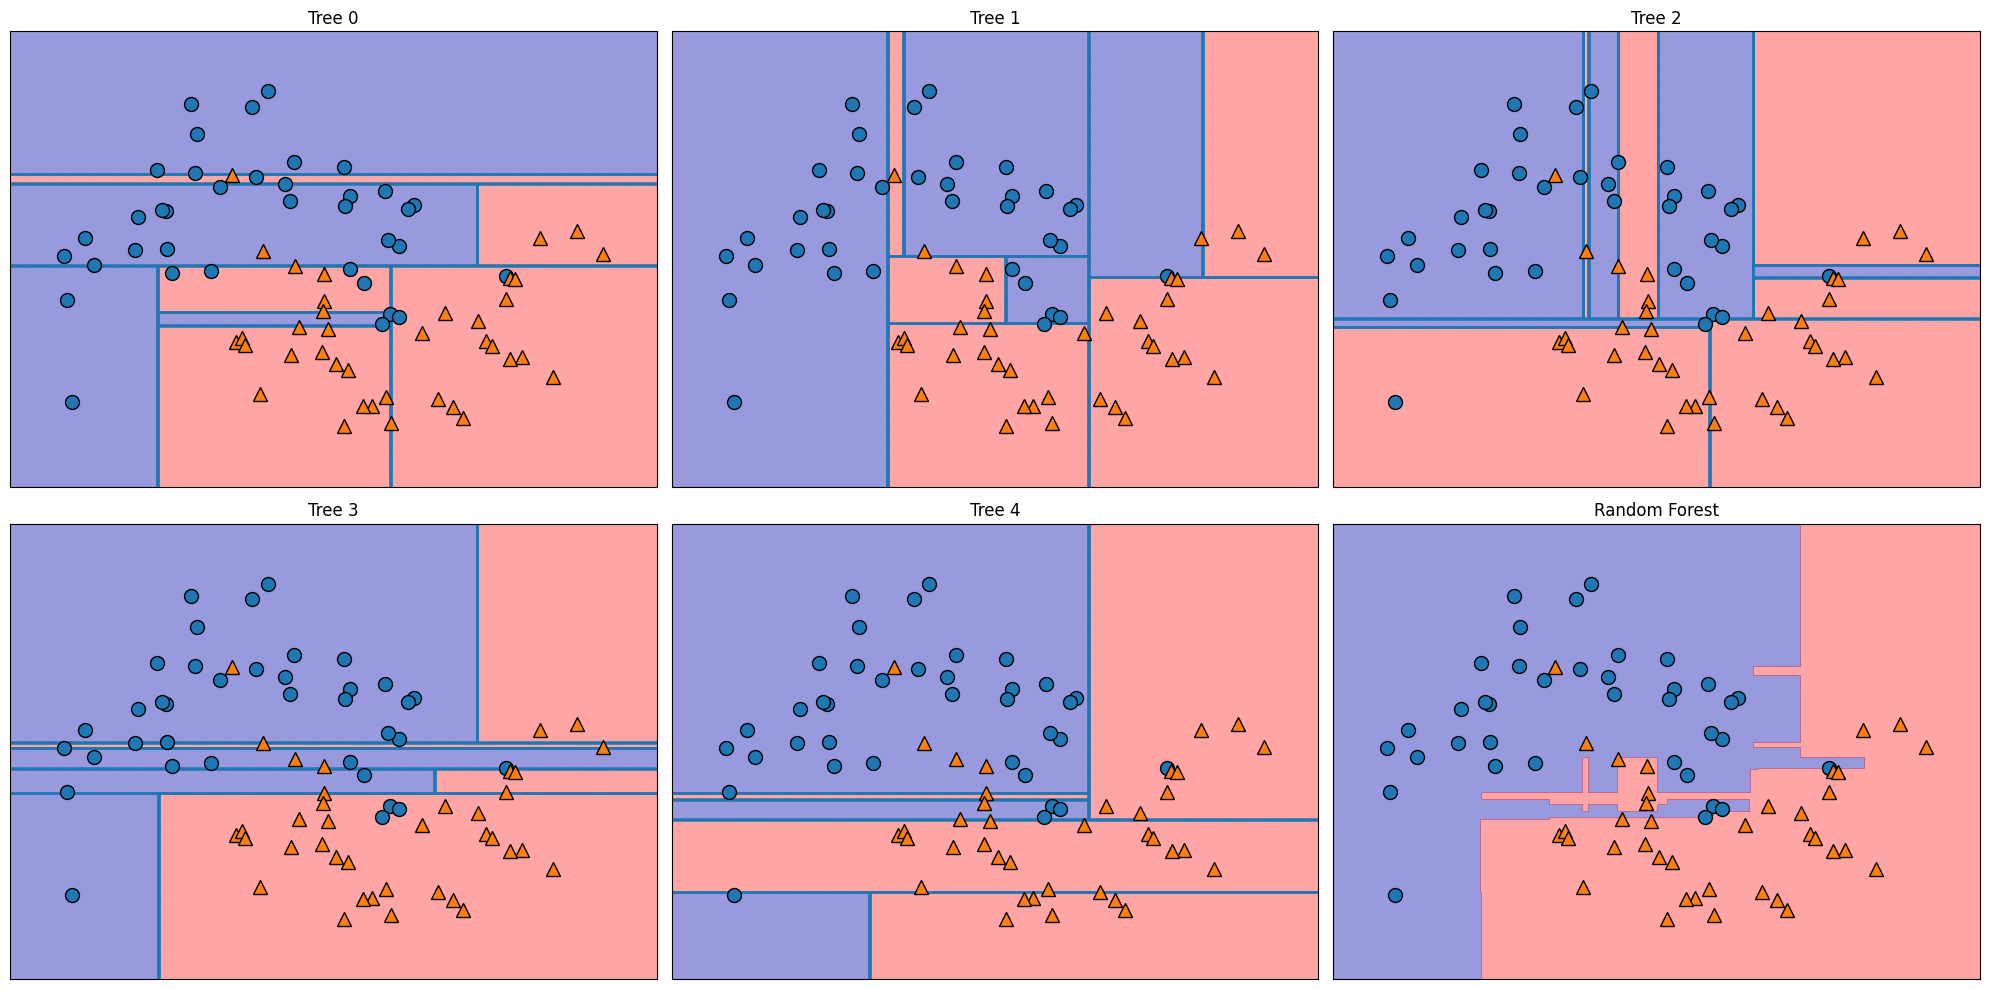

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.tight_layout()

The five individual trees each produce different (and somewhat irregular) decision boundaries. Each tree makes mistakes on some portion of the data -- partly because bootstrap sampling means each tree is trained on a different subset, and partly because feature subsampling forces different split choices.

The bottom-right panel shows the combined Random Forest prediction, which is noticeably smoother and more accurate than any individual tree. The averaging process cancels out the individual trees' errors, producing a more robust decision boundary.

#### Random Forest on Breast Cancer Dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Results with 100 trees:
- Training accuracy: **1.000**
- Test accuracy: **0.972**

The 100% training accuracy is typical for random forests (individual trees are usually grown fully), but the test accuracy of 97.2% is excellent -- better than both the single decision tree (95.1%) and Logistic Regression (95.8% at best). This was achieved with no parameter tuning at all, using entirely default settings.

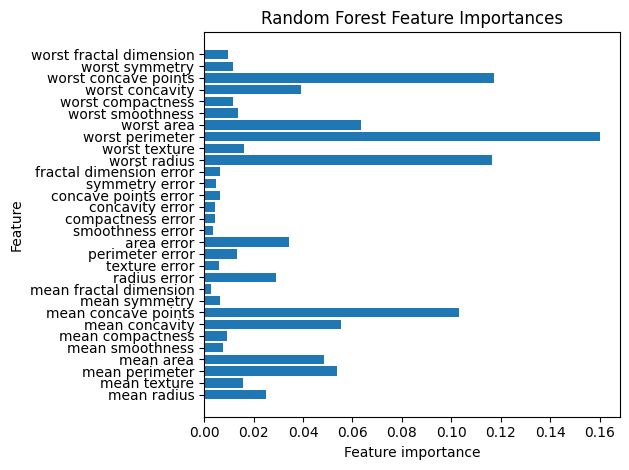

In [47]:
plot_feature_importances_cancer(forest)
plt.title("Random Forest Feature Importances")
plt.tight_layout()

Compared to the single decision tree, the random forest distributes importance more broadly across features. While "worst radius" was overwhelmingly dominant in the single tree (importance ~0.73), the random forest gives "worst perimeter" the highest importance and assigns nonzero importance to many more features.

This happens because the feature subsampling mechanism forces different trees to use different features. When "worst radius" is not available in a particular split, the tree uses correlated alternatives like "worst perimeter" or "mean concave points." The result is a more comprehensive and reliable picture of feature relevance.

### Random Forests: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Strengths** | Robust, powerful, no scaling needed, easily parallelized (`n_jobs=-1`) |
| **Weaknesses** | Not ideal for high-dimensional sparse data, more memory than linear models |
| **Key params** | `n_estimators` (more is always better, with diminishing returns), `max_features`, pre-pruning |
| **Defaults** | `max_features=sqrt(n_features)` for classification, `log2(n_features)` for regression |

Practical notes:
- `n_estimators`: More trees always help but cost more time and memory. A common approach is to use as many as your budget allows.
- `max_features`: Lower values make trees more different (more randomness), which can reduce overfitting but may require deeper trees.
- Random forests are non-deterministic. Set `random_state` for reproducibility. With enough trees, the choice of random state has negligible effect.
- Training can be parallelized trivially across CPU cores. Set `n_jobs=-1` to use all available cores.

### 9.2 Gradient Boosted Decision Trees

Gradient boosting builds an ensemble of trees **sequentially**. Each new tree is trained to correct the residual errors of the current ensemble:

1. Start with a simple prediction (e.g., the mean of the target).
2. Compute the residuals (errors) of the current model.
3. Fit a shallow tree to predict these residuals.
4. Add this tree to the ensemble, scaled by the **learning rate** $\eta$.
5. Repeat for $T$ iterations.

The prediction of the ensemble after $T$ steps is:

$$\hat{y} = \sum_{t=1}^{T} \eta \cdot f_t(\mathbf{x})$$

where $f_t$ is the $t$-th tree and $\eta$ is the learning rate.

Key characteristics:
- Uses **shallow trees** (often depth 1-5) as "weak learners."
- No randomization by default -- relies on sequential error correction.
- The learning rate $\eta$ controls how aggressively each tree corrects. Smaller values require more trees but often generalize better.
- Frequently the winning method in machine learning competitions.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Default (max_depth=3, learning_rate=0.1, n_estimators=100)")
print("  Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("  Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Default (max_depth=3, learning_rate=0.1, n_estimators=100)
  Accuracy on training set: 1.000
  Accuracy on test set: 0.965


Default settings (`max_depth=3`, `learning_rate=0.1`, `n_estimators=100`):
- Training accuracy: **1.000**
- Test accuracy: **0.965**

The 100% training accuracy suggests overfitting. Despite gradient boosting's use of shallow trees, 100 sequential trees with depth 3 provide enough capacity to memorize the training data.

The 100% training accuracy indicates overfitting. Two strategies to reduce complexity: limit tree depth further, or reduce the learning rate.

In [49]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("max_depth=1")
print("  Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("  Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("\nlearning_rate=0.01")
print("  Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("  Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

max_depth=1
  Accuracy on training set: 0.991
  Accuracy on test set: 0.972

learning_rate=0.01
  Accuracy on training set: 0.988
  Accuracy on test set: 0.958


Results of reducing model complexity:

| Setting | Train Accuracy | Test Accuracy |
|---------|---------------|---------------|
| Default (`max_depth=3`, `lr=0.1`) | 1.000 | 0.965 |
| `max_depth=1` | 0.991 | **0.972** |
| `learning_rate=0.01` | 0.988 | 0.958 |

Reducing `max_depth` to 1 (decision stumps) improved test accuracy to 97.2% -- the same as the random forest. This confirms that the default model was overfitting.

Lowering the learning rate to 0.01 also reduced overfitting (training drops from 1.0 to 0.988), but test accuracy is only 0.958 because 100 trees with such a low learning rate is insufficient. In general, `learning_rate` and `n_estimators` should be tuned together: a lower learning rate requires more trees.

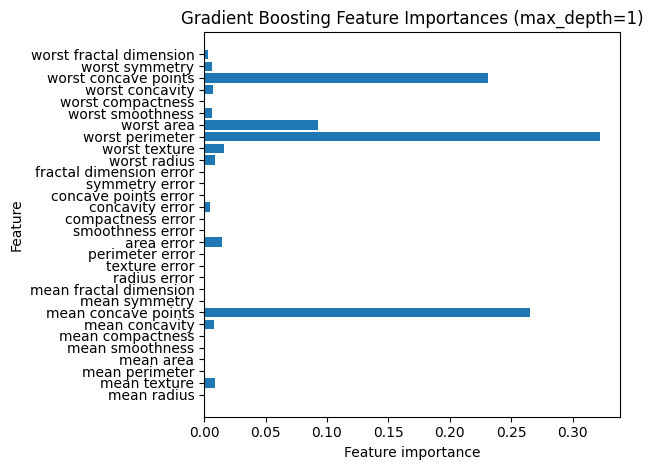

In [50]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)
plt.title("Gradient Boosting Feature Importances (max_depth=1)")
plt.tight_layout()

The gradient boosting feature importances show a pattern similar to random forests but more concentrated. Some features are completely ignored (importance = 0). Because gradient boosting uses depth-1 trees here (single splits), each tree can only use one feature, so the model naturally selects the most predictive features and ignores the rest.

### Gradient Boosting: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Strengths** | Among the most powerful supervised models, no feature scaling needed |
| **Weaknesses** | Requires careful parameter tuning, slower to train than random forests |
| **Key params** | `n_estimators`, `learning_rate` (highly interconnected), `max_depth` (usually 1-5) |

Practical advice:
- Start with **Random Forests** as a baseline. They work well with default parameters.
- If you need to squeeze out more accuracy and are willing to tune, switch to gradient boosting.
- The two most important hyperparameters are `learning_rate` and `n_estimators`. Lower learning rates generally yield better generalization but require more trees. A common approach: fix `n_estimators` to the maximum your time budget allows, then search over `learning_rate`.
- For large-scale problems, consider **XGBoost** or **LightGBM**, which offer faster implementations and additional regularization options.

## 10. Kernelized Support Vector Machines (SVMs)

Kernelized SVMs extend linear SVMs to learn **nonlinear** decision boundaries. The core idea: map the data into a higher-dimensional space where a linear separator exists, then find that separator. The **kernel trick** makes this computationally feasible without explicitly computing the high-dimensional features.

### 10.1 The Motivation: Linear Models Fail on Nonlinear Data

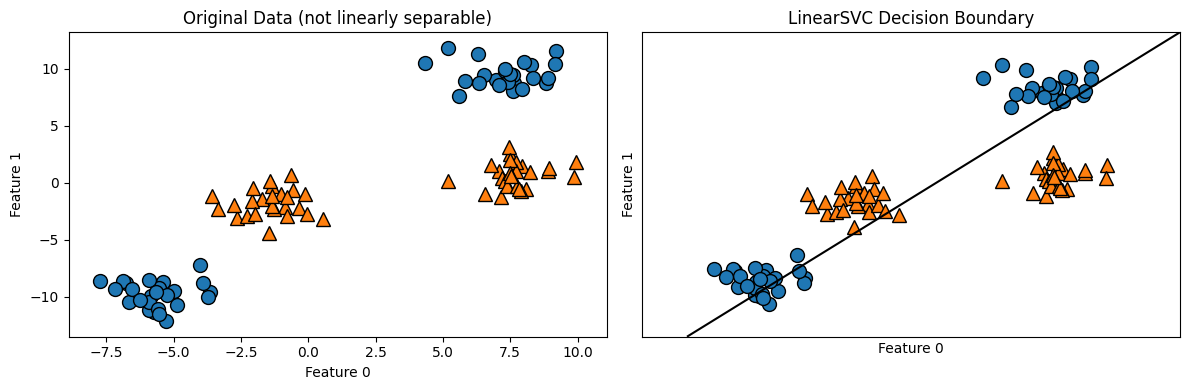

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original data
axes[0].set_title("Original Data (not linearly separable)")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")

# Linear SVM attempt
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X, ax=axes[1])
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
axes[1].set_title("LinearSVC Decision Boundary")
axes[1].set_xlabel("Feature 0")
axes[1].set_ylabel("Feature 1")
plt.tight_layout()

The left panel shows a dataset where the two classes cannot be separated by any straight line. The right panel confirms this: the best linear boundary misclassifies a significant portion of both classes. No matter how we tilt or shift the line, a linear model cannot solve this problem. We need a nonlinear approach.

### 10.2 Adding Nonlinear Features

One approach: manually create new features that make the data linearly separable. Here we add $x_1^2$ as a third feature, transforming each 2D point $(x_0, x_1)$ into a 3D point $(x_0, x_1, x_1^2)$.

In this expanded space, a linear separator (a plane) may exist even though no line works in the original 2D space:

Text(0.5, 0, 'feature1 ** 2')

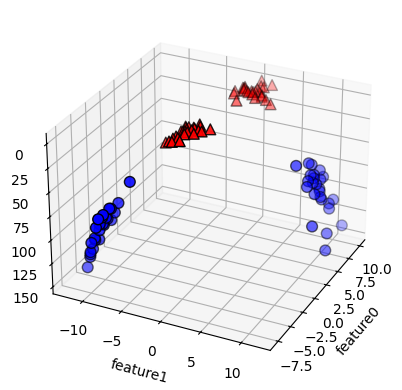

In [52]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the 3D space, the two classes are now vertically separated. The blue points (class 0) sit at different heights than the red triangles (class 1), thanks to the $x_1^2$ feature. A flat plane can now separate them.

Text(0.5, 0, 'feature1 ** 2')

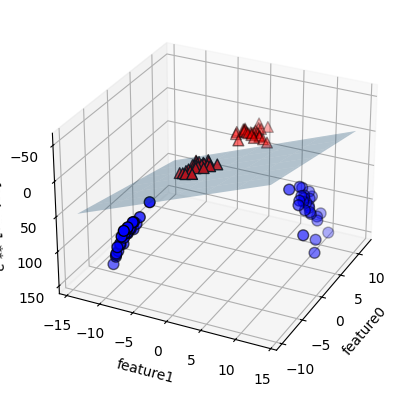

In [53]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

The linear SVM successfully finds a separating plane in 3D. The plane is defined by:

$$w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_1^2 + b = 0$$

Even though this is a linear function in the 3D space $(x_0, x_1, x_1^2)$, it corresponds to a **nonlinear** function in the original 2D space $(x_0, x_1)$.

Projected back to the original 2D features, the linear boundary in 3D becomes a curved (elliptical) boundary:

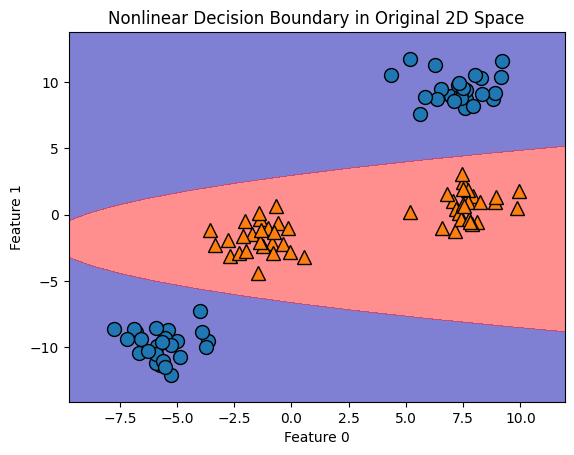

In [54]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Nonlinear Decision Boundary in Original 2D Space")
plt.show()

The decision boundary in the original 2D space is an ellipse -- clearly nonlinear. This demonstrates the key insight: a linear model in an expanded feature space is equivalent to a nonlinear model in the original space.

The challenge: for high-dimensional data, we do not know which features to add, and adding all possible polynomials can be computationally prohibitive. This is where the kernel trick comes in.

### 10.3 The Kernel Trick and the RBF Kernel

The kernel trick avoids computing the expanded features explicitly. Instead, it works with a **kernel function** that computes the similarity between pairs of data points as if they were in the expanded space.

The most commonly used kernel is the **Radial Basis Function (RBF)** kernel, also called the Gaussian kernel:

$$k(\mathbf{x}_1, \mathbf{x}_2) = \exp(-\gamma \|\mathbf{x}_1 - \mathbf{x}_2\|^2)$$

This kernel corresponds to an infinite-dimensional feature expansion -- it considers polynomials of all degrees, with higher-degree terms weighted less. In practice, this means the RBF kernel can learn very complex boundaries.

Two parameters control the model:
- **$\gamma$ (gamma)**: Controls the width of the kernel. Small $\gamma$ means points far apart are still considered similar (smooth boundary). Large $\gamma$ means only very close points are similar (complex boundary).
- **$C$**: Regularization parameter. Small $C$ means strong regularization (each data point has limited influence). Large $C$ means weak regularization (the model tries to classify every point correctly).

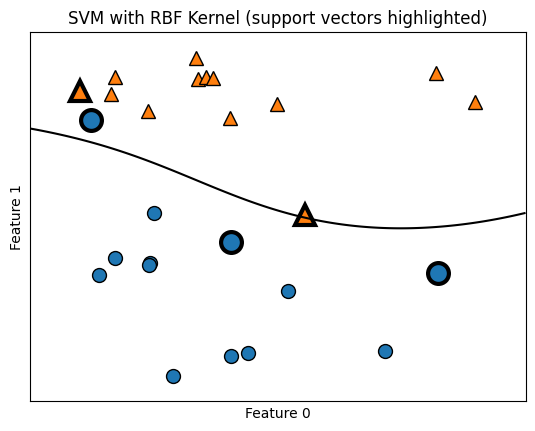

In [55]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("SVM with RBF Kernel (support vectors highlighted)")
plt.show()

The plot shows the RBF SVM's decision boundary with `C=10` and `gamma=0.1`. The boundary is smooth and nonlinear. The larger points with thick outlines are the **support vectors** -- training points that lie on or near the decision boundary and define it. Points far from the boundary have no influence on the model.

Only a subset of training points become support vectors, which is a key property of SVMs. The decision function for a new point depends only on its distances to the support vectors.

#### Tuning C and Gamma

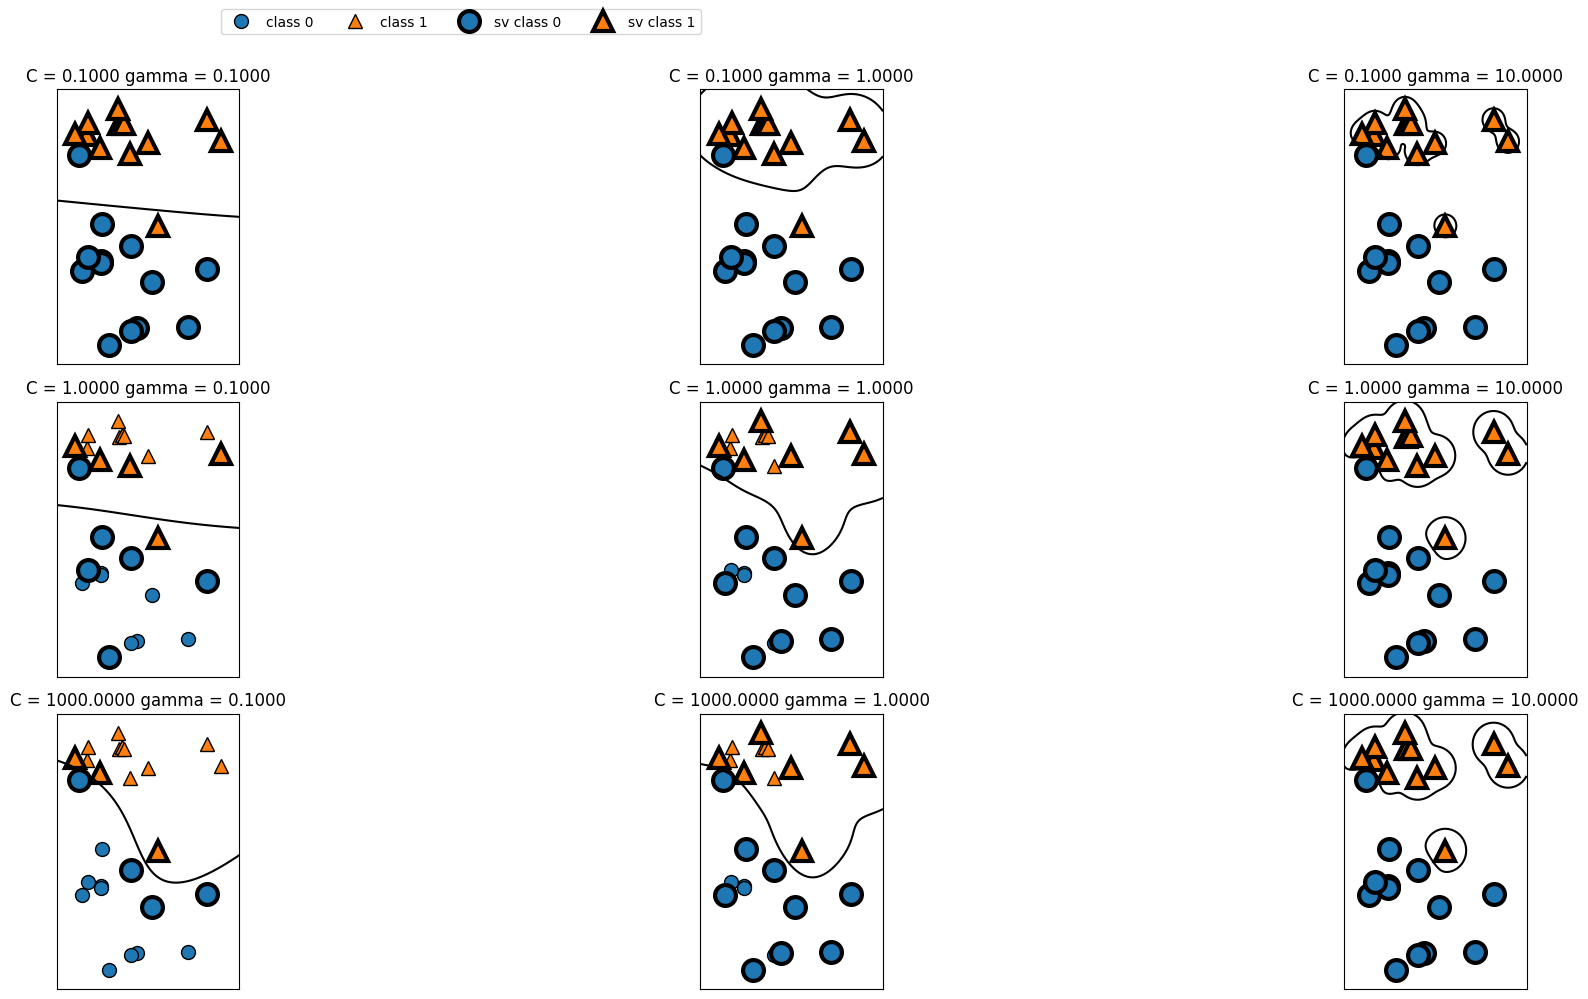

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                   ncol=4, loc=(.9, 1.2))
plt.tight_layout()

The 3x3 grid shows the interaction between C and gamma:

**Rows (C increasing top to bottom)**:
- Top row (C=0.1): Strong regularization. The boundary is simple and may misclassify some training points.
- Bottom row (C=1000): Weak regularization. The boundary bends to classify every point correctly.

**Columns (gamma increasing left to right)**:
- Left column (gamma=0.1): Large kernel width. Points far apart are considered similar, yielding smooth boundaries.
- Right column (gamma=10): Small kernel width. Only very nearby points matter, yielding complex, localized boundaries.

The bottom-right corner (high C, high gamma) shows the most overfitting: the model creates tiny "islands" around individual points. The top-left corner (low C, low gamma) shows the most underfitting: an almost linear boundary.

Good values of C and gamma are strongly correlated. They should always be tuned together, typically on a logarithmic grid.

### 10.4 SVMs on Breast Cancer Dataset -- The Importance of Scaling

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)
print("WITHOUT scaling:")
print("  Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("  Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

WITHOUT scaling:
  Accuracy on training set: 0.90
  Accuracy on test set: 0.94


Without feature scaling:
- Training accuracy: **0.90**
- Test accuracy: **0.94**

These results are poor compared to other models we have seen on this dataset. The unusual pattern of test accuracy exceeding training accuracy (0.94 > 0.90) is a sign that something is wrong -- not that the model generalizes well. The problem is feature scaling.

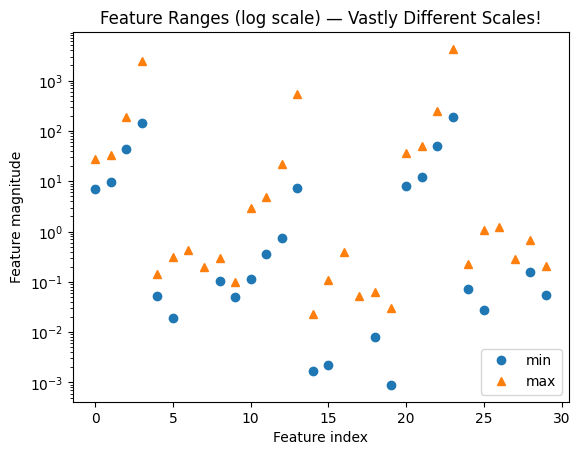

In [58]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")
plt.title("Feature Ranges (log scale) — Vastly Different Scales!")
plt.show()

The plot reveals the problem: features vary across completely different scales. Some features (like "mean area" and "worst area") range into the thousands, while others (like "mean smoothness") are below 0.2. On a log scale, the features span roughly four orders of magnitude.

The RBF kernel computes Euclidean distances between points. When features have vastly different scales, the distance is dominated by the largest-scale features, and small-scale features are effectively ignored. This cripples the SVM's ability to use all available information.

In [59]:
# Min-Max scaling to [0, 1]
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("WITH scaling (MinMax to [0,1]):")
print("  Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("  Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("\nWITH scaling + C=1000:")
print("  Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("  Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

WITH scaling (MinMax to [0,1]):
  Accuracy on training set: 0.984
  Accuracy on test set: 0.972

WITH scaling + C=1000:
  Accuracy on training set: 1.000
  Accuracy on test set: 0.958


After MinMax scaling (all features to [0, 1]):

| Setting | Train Accuracy | Test Accuracy |
|---------|---------------|---------------|
| Without scaling | 0.90 | 0.94 |
| With scaling (C=1) | 0.984 | 0.972 |
| With scaling (C=1000) | 1.000 | 0.958 |

Scaling made a dramatic difference. With the default C=1, both training and test accuracy improved substantially. The model is now in a mild underfitting regime (training and test scores are close but below 100%).

Increasing C to 1000 pushes training accuracy to 100% but test accuracy drops slightly to 95.8%, suggesting mild overfitting. The best result here is with the default C=1 after scaling.

The lesson: **always scale your features before applying SVMs**. In Chapter 3, we will cover `MinMaxScaler` and `StandardScaler` for this purpose.

### SVMs: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Strengths** | Powerful on medium-sized datasets, complex nonlinear boundaries, works in both low and high dimensions |
| **Weaknesses** | Requires feature scaling, slow for large datasets (>10,000 samples), hard to interpret |
| **Key params** | `C` and `gamma` (strongly correlated -- tune together on a log scale) |

SVMs work well when all features represent measurements in similar units (e.g., pixel intensities). They are less suitable for datasets with heterogeneous feature types or very large sample sizes. For most practical applications, tree-based ensembles (which require no scaling) have largely replaced SVMs as the default choice.

## 11. Neural Networks (Deep Learning)

**Multilayer Perceptrons (MLPs)** generalize linear models by introducing intermediate computation steps called **hidden layers**. Each hidden layer applies a linear transformation followed by a nonlinear **activation function**, enabling the network to learn complex, nonlinear relationships.

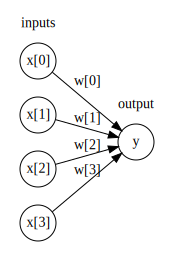

In [60]:
display(mglearn.plots.plot_logistic_regression_graph())

This diagram shows a linear model as a neural network with no hidden layers. Each input feature connects directly to the output with a learned weight. The output is:

$$\hat{y} = w_0 x_0 + w_1 x_1 + \cdots + w_p x_p + b = \mathbf{w}^\top \mathbf{x} + b$$

This is identical to logistic regression or linear regression.

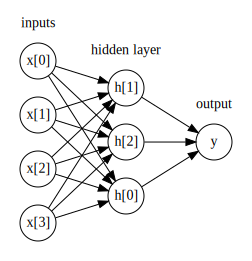

In [61]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Adding a hidden layer introduces intermediate computations. Each hidden unit $h_j$ computes a weighted sum of the inputs, then applies a nonlinear activation function $\sigma$:

$$h_j = \sigma\left(\sum_{i=0}^{p} w_{ij}^{(1)} x_i + b_j^{(1)}\right)$$

The output is then a weighted sum of the hidden units:

$$\hat{y} = \sum_{j=0}^{m} w_j^{(2)} h_j + b^{(2)}$$

where $m$ is the number of hidden units. The superscripts (1) and (2) denote the first and second layer weights respectively. This architecture has $(p+1) \times m + (m+1)$ learnable parameters.

### 11.1 Activation Functions

The activation function $\sigma$ is what makes neural networks more powerful than linear models. Without it, stacking multiple linear layers would collapse to a single linear transformation (a product of matrices is still a matrix).

Two common choices:

- **ReLU** (Rectified Linear Unit): $\sigma(z) = \max(0, z)$. Outputs the input directly if positive, zero otherwise. Simple and effective; the default in most modern networks.

- **tanh** (Hyperbolic tangent): $\sigma(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$. Squashes the output to the range $(-1, 1)$. Smoother than ReLU but can suffer from vanishing gradients.

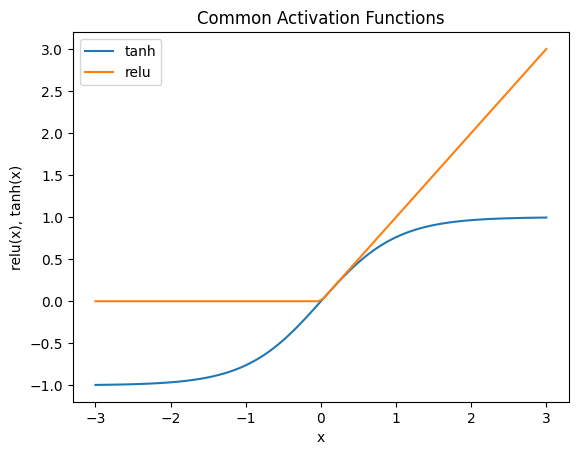

In [62]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.title("Common Activation Functions")
plt.show()

The plot shows both activation functions. ReLU is piecewise linear: zero for negative inputs, identity for positive inputs. The "kink" at zero is what introduces nonlinearity. Tanh is a smooth S-shaped curve that saturates at -1 and +1 for large inputs.

With ReLU activation, each hidden unit partitions the input space with a straight line (on/off boundary). The decision function of a network with one hidden layer and ReLU is a piecewise linear function -- the more hidden units, the more "segments" it has.

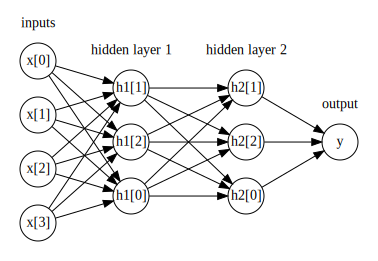

In [63]:
mglearn.plots.plot_two_hidden_layer_graph()

Adding a second hidden layer increases the network's capacity further. With two hidden layers of $m$ units each and $p$ input features, the total number of learnable parameters is approximately:

$$(p + 1) \times m + (m + 1) \times m + (m + 1) = pm + m^2 + 2m + 1$$

For example, with $p=100$ features and $m=100$ hidden units per layer: $100 \times 100 + 100 \times 100 + 2 \times 100 + 1 = 20{,}201$ parameters. Deep networks can have millions of parameters.

### 11.2 Tuning Neural Networks on Two Moons

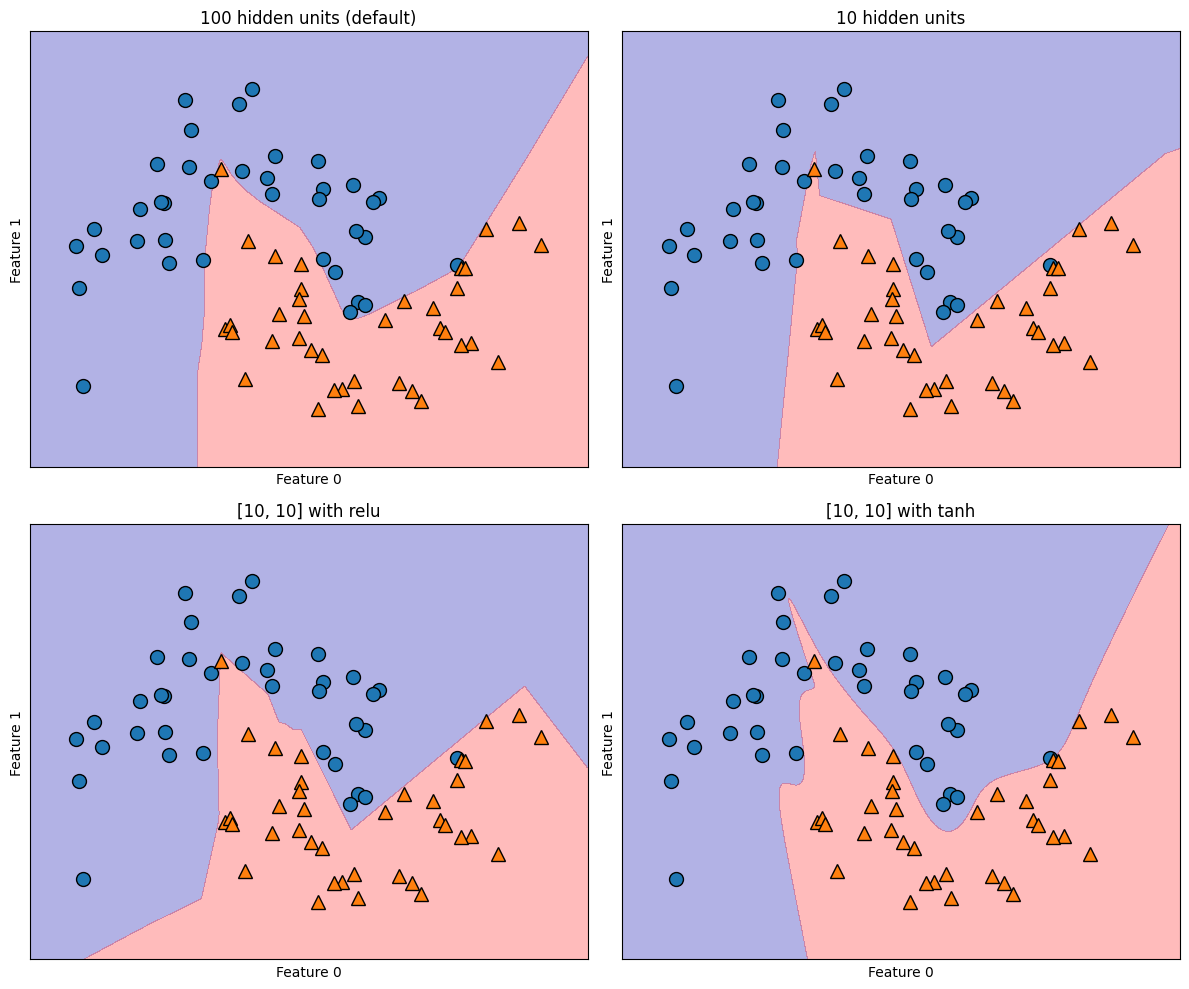

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Default (100 hidden units)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axes[0, 0])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 0])
axes[0, 0].set_title("100 hidden units (default)")

# 10 hidden units
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axes[0, 1])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[0, 1])
axes[0, 1].set_title("10 hidden units")

# Two layers of 10
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axes[1, 0])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[1, 0])
axes[1, 0].set_title("[10, 10] with relu")

# Two layers of 10 with tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0,
                     hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axes[1, 1])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=axes[1, 1])
axes[1, 1].set_title("[10, 10] with tanh")

for ax in axes.ravel():
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.tight_layout()

The four panels show how architecture choices affect the decision boundary:

- **Top left (100 hidden units, default)**: Smooth, well-fitting boundary. 100 units is more than enough for this simple dataset.
- **Top right (10 hidden units)**: Slightly more angular boundary (fewer ReLU segments). Still captures the overall shape well.
- **Bottom left ([10, 10] with ReLU)**: Two layers of 10 units. The boundary is smooth despite fewer units per layer, because the second layer can combine the first layer's features.
- **Bottom right ([10, 10] with tanh)**: Same architecture but with tanh activation. The boundary is even smoother because tanh produces smooth outputs rather than piecewise linear ones.

All four configurations classify the data well, demonstrating that neural networks can learn nonlinear boundaries effectively.

#### Effect of Alpha (L2 Regularization) on Neural Networks

Like Ridge regression, MLPs support L2 regularization through the `alpha` parameter. The loss function becomes:

$$\mathcal{L} = \text{data loss} + \alpha \sum_{l} \|\mathbf{W}^{(l)}\|_F^2$$

where $\|\mathbf{W}^{(l)}\|_F$ is the Frobenius norm (sum of squared weights) of the $l$-th layer weight matrix. Larger `alpha` means stronger regularization, pushing weights toward zero and producing simpler decision boundaries.

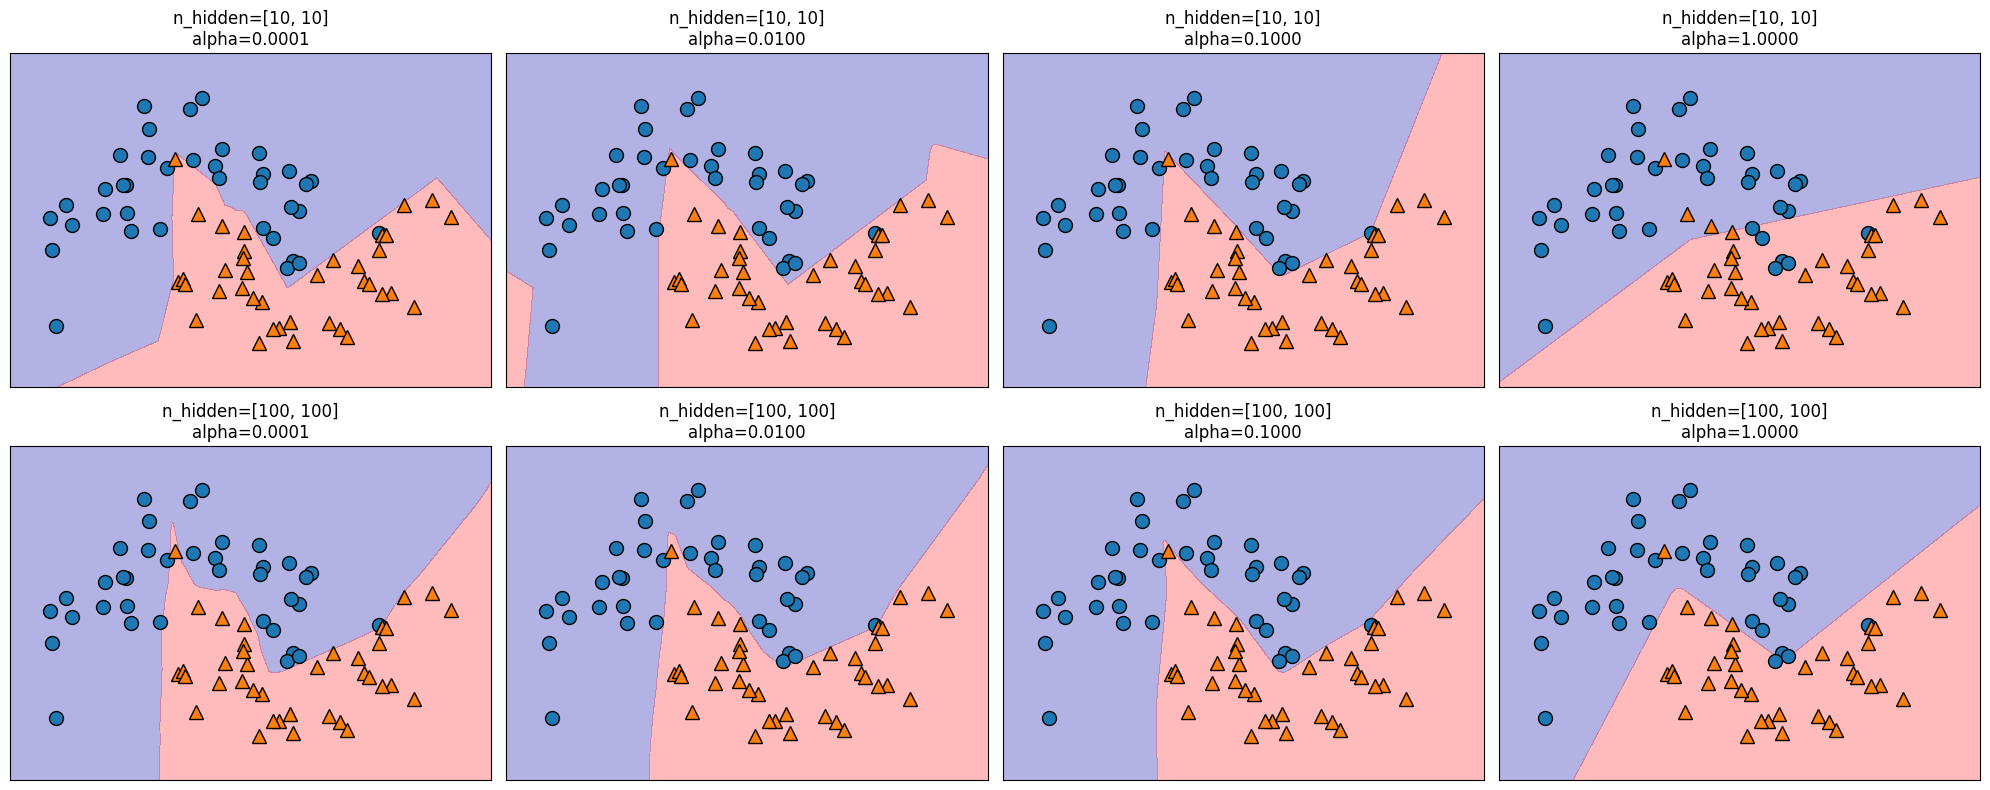

In [65]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                             hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                             alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))
plt.tight_layout()

The 2x4 grid shows the effect of `alpha` for two network sizes:

**Top row (10 hidden units per layer)**:
- At `alpha=0.0001` (weak regularization), the boundary is complex and fits the training data closely.
- At `alpha=1` (strong regularization), the boundary becomes much smoother, almost linear.

**Bottom row (100 hidden units per layer)**:
- The larger network has more capacity, so it produces more complex boundaries at the same alpha values.
- Even with `alpha=1`, the 100-unit network maintains a more complex boundary than the 10-unit network.

The interaction between network size and regularization is important: larger networks need stronger regularization to avoid overfitting. In practice, it is common to start with a large network and use regularization to control complexity.

#### Effect of Random Initialization

Neural network weights are initialized randomly before training. Different random seeds lead to different local optima, which can produce noticeably different models even with identical hyperparameters.

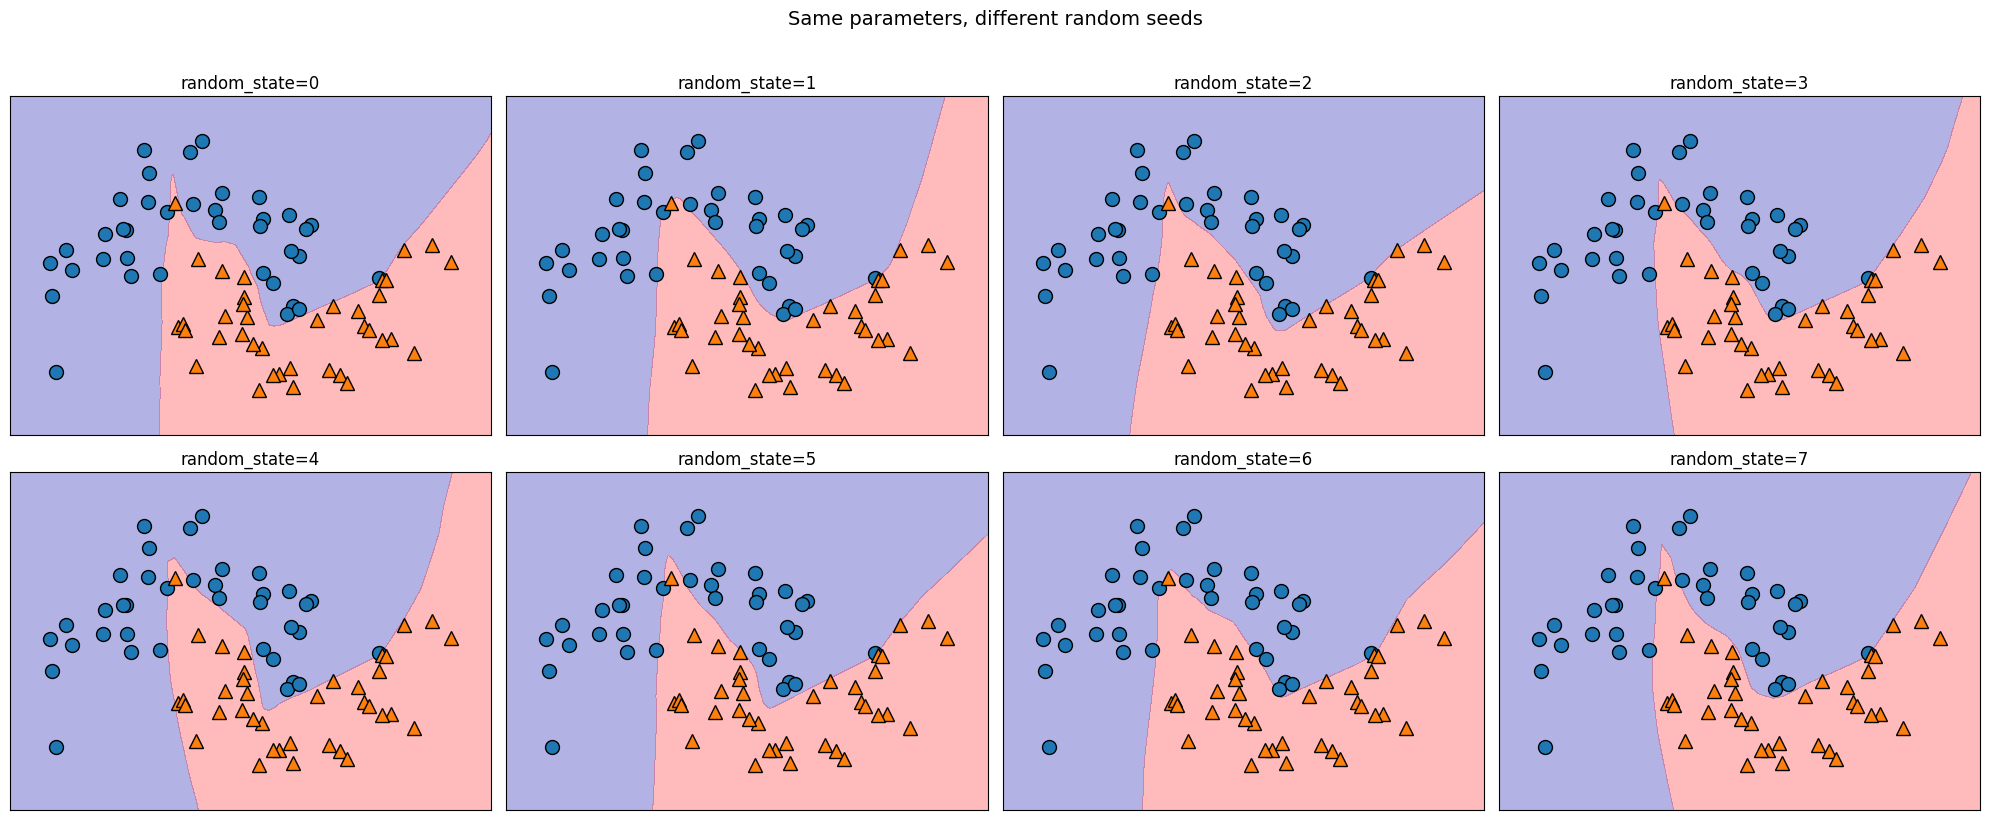

In [66]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                         hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random_state={}".format(i))
plt.suptitle("Same parameters, different random seeds", fontsize=14, y=1.02)
plt.tight_layout()

The eight panels use identical settings (`hidden_layer_sizes=[100, 100]`, default alpha) but different random seeds. The decision boundaries vary visibly -- some are smoother, others have unusual bulges or kinks. All are reasonable fits to the data, but the details differ.

This sensitivity to initialization is an important property of neural networks. For larger networks and larger datasets, the variation tends to be smaller. When reproducibility matters, always fix the `random_state`. When robustness matters, consider training multiple networks and averaging their predictions (ensemble of neural networks).

### 11.3 Neural Networks on Breast Cancer (with Scaling)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Without scaling
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("WITHOUT scaling:")
print("  Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print("  Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))

# Standard scaling
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("\nWITH scaling (StandardScaler):")
print("  Training set accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("  Test set accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# With stronger regularization
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("\nWITH scaling + alpha=1:")
print("  Training set accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("  Test set accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

WITHOUT scaling:
  Training set accuracy: 0.94
  Test set accuracy: 0.92

WITH scaling (StandardScaler):
  Training set accuracy: 1.000
  Test set accuracy: 0.972

WITH scaling + alpha=1:
  Training set accuracy: 0.988
  Test set accuracy: 0.972


Results on the Breast Cancer dataset:

| Setting | Train Accuracy | Test Accuracy |
|---------|---------------|---------------|
| Without scaling | 0.94 | 0.92 |
| With scaling (default alpha) | 1.000 | 0.972 |
| With scaling + alpha=1 | 0.988 | 0.972 |

Without scaling, the MLP underperforms significantly (92% test accuracy). Recall that the feature magnitudes span orders of magnitude -- the gradient-based optimizer struggles when features are on different scales.

After standardization (zero mean, unit variance), performance jumps to 97.2% test accuracy. Increasing `alpha` to 1 (strong regularization) slightly reduces training accuracy but maintains the same test accuracy, suggesting the default model was mildly overfitting.

The final result (97.2% test accuracy) matches the best results from Random Forests and Gradient Boosting.

#### Visualizing Learned Weights

We can inspect the weight matrix connecting the input layer to the first hidden layer. Each column represents one hidden unit, and each row represents one input feature. The magnitude and sign of the weights indicate which features each hidden unit attends to.

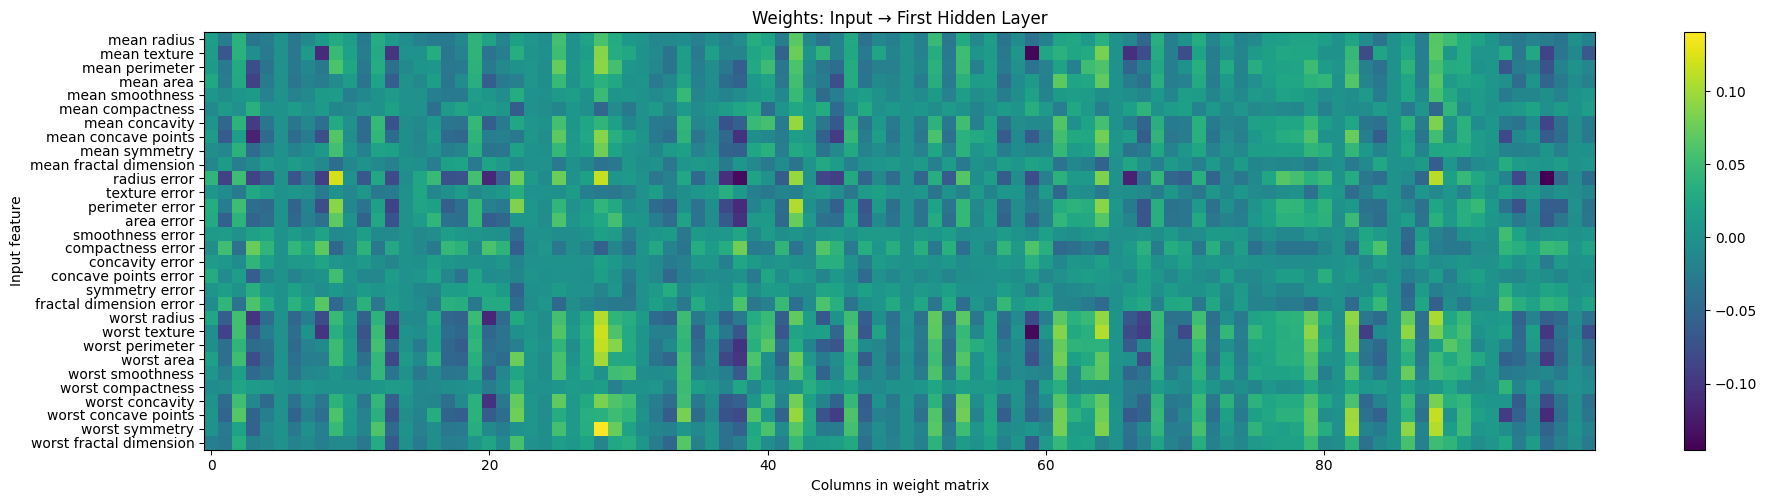

In [68]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.title("Weights: Input → First Hidden Layer")
plt.tight_layout()

The heatmap shows the first-layer weight matrix with shape (30 features x 100 hidden units). Light colors represent large positive weights and dark colors represent negative weights.

Some features (like "mean smoothness" and the features between "smoothness error" and "fractal dimension error") have consistently small weights across most hidden units, suggesting they contribute less to the model's predictions. However, interpretation of neural network weights is difficult -- unlike linear models, the relationship between weights and predictions is highly nonlinear due to the activation functions and subsequent layers.

For more interpretable feature importance in neural networks, techniques like **permutation importance** (Chapter 5) or **SHAP values** are recommended over direct weight inspection.

### Neural Networks: Strengths, Weaknesses, and Parameters

| Aspect | Details |
|--------|---------|
| **Strengths** | Can learn extremely complex models, state-of-the-art on many tasks |
| **Weaknesses** | Long training time, requires feature scaling, sensitive to parameters and random initialization |
| **Key params** | `hidden_layer_sizes`, `alpha` (L2 regularization), `solver` ('adam' or 'lbfgs'), `max_iter` |

**Estimating model complexity**: Count the number of learned weights.
- Example: 100 input features, two hidden layers of 100 units each, binary output:
  - Layer 1: $100 \times 100 = 10{,}000$ weights
  - Layer 2: $100 \times 100 = 10{,}000$ weights
  - Output: $100 \times 1 = 100$ weights
  - Total: approximately 20,100 parameters

**Practical strategy**:
1. Start with a network large enough to overfit the training data (this confirms the architecture has sufficient capacity).
2. Then reduce complexity by shrinking the network, increasing `alpha`, or adding dropout.
3. Use 'adam' solver (default) with scaled data. Try 'lbfgs' for small datasets.
4. For production deep learning, use dedicated libraries (PyTorch, TensorFlow/Keras) which support GPUs and more flexible architectures.

## 12. Uncertainty Estimates from Classifiers

In many applications, knowing **how confident** a classifier is matters as much as the prediction itself. For example, in medical diagnosis, a prediction of "malignant" with 51% confidence should be treated very differently from one with 99% confidence.

scikit-learn provides two methods for uncertainty estimation:

- **`decision_function(X)`**: Returns a raw score for each sample. Positive values favor the positive class, negative values favor the negative class. The magnitude indicates confidence, but the scale is arbitrary.

- **`predict_proba(X)`**: Returns estimated probabilities for each class. Values are between 0 and 1, and the probabilities for all classes sum to 1. Generally easier to interpret than `decision_function`.

A model is called **calibrated** if its predicted probabilities match empirical frequencies -- e.g., among all predictions with 70% confidence, approximately 70% are actually correct.

### 12.1 Binary Classification Uncertainty

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [70]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
print("\nFirst 6 entries of decision_function:")
print(gbrt.decision_function(X_test)[:6])

print("\nThresholded (>0):", gbrt.decision_function(X_test)[:6] > 0)
print("Predictions:     ", gbrt.predict(X_test)[:6])

Decision function shape: (25,)

First 6 entries of decision_function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]

Thresholded (>0): [ True False False False  True  True]
Predictions:      ['red' 'blue' 'blue' 'blue' 'red' 'red']


The `decision_function` returns one value per sample (shape `(25,)` for 25 test samples).

Looking at the first 6 values: `[4.14, -1.70, -3.95, -3.63, 4.29, 3.66]`

- Positive values (4.14, 4.29, 3.66) predict "red" (the positive class).
- Negative values (-1.70, -3.95, -3.63) predict "blue" (the negative class).
- Larger absolute values indicate higher confidence.

The predictions match exactly with thresholding at zero: `decision_function > 0` gives `[True, False, False, False, True, True]`, which corresponds to `['red', 'blue', 'blue', 'blue', 'red', 'red']`.

In general, for binary classification:
$$\hat{y} = \text{classes\_}[\mathbf{1}(f(\mathbf{x}) > 0)]$$

where `classes_[0]` is the negative class and `classes_[1]` is the positive class.

In [71]:
print("\nPredicted probabilities (first 6):")
print(gbrt.predict_proba(X_test[:6]))
print("\nNote: Each row sums to 1")


Predicted probabilities (first 6):
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]

Note: Each row sums to 1


The `predict_proba` output is more intuitive. Each row contains two probabilities (one per class) that sum to 1:

- First sample: `[0.016, 0.984]` -- 98.4% confident it is "red." Strong prediction.
- Second sample: `[0.846, 0.154]` -- 84.6% confident it is "blue." Fairly confident.
- Third sample: `[0.981, 0.019]` -- 98.1% confident it is "blue." Very strong prediction.

The predicted class is always the one with probability > 0.5. Unlike `decision_function`, the probabilities have a clear interpretation and a fixed scale [0, 1].

Note: overfitted models tend to produce extreme probabilities (close to 0 or 1) even when wrong, while well-regularized models produce more calibrated uncertainty estimates.

#### Visualizing Decision Boundary and Predicted Probabilities

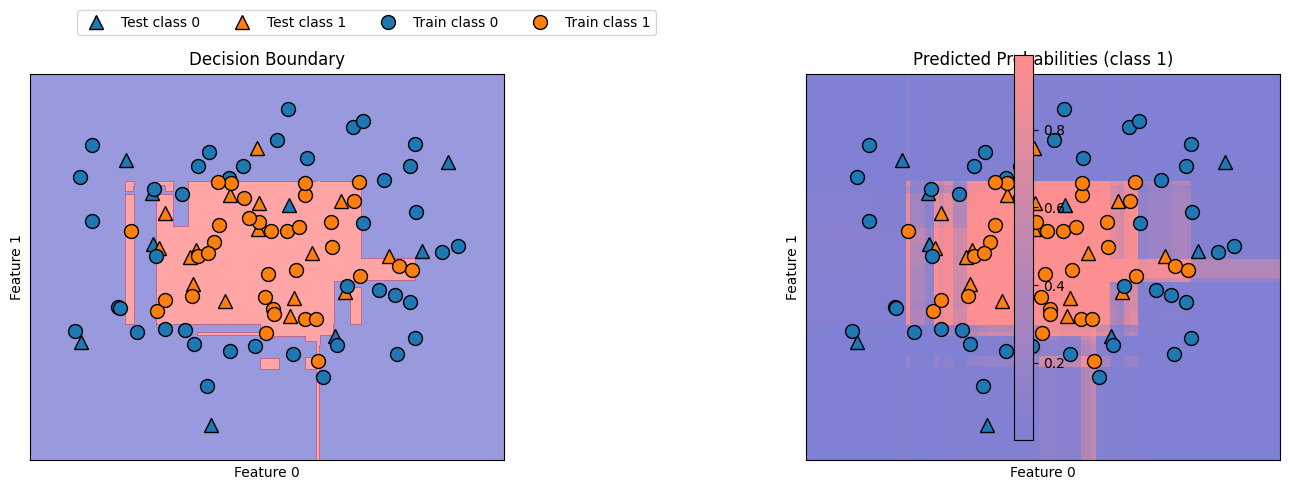

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                             alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].set_title("Decision Boundary")
axes[1].set_title("Predicted Probabilities (class 1)")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.tight_layout()

The left panel shows the hard decision boundary -- the crisp border between the "blue" and "red" regions. The right panel shows the predicted probability for class "red" as a continuous color gradient.

In the right panel, the decision boundary corresponds to the 0.5 probability contour. Points deep inside a class region have probabilities close to 0 or 1 (dark blue or dark red). Points near the boundary have intermediate probabilities (lighter colors), reflecting the model's uncertainty in that region.

The probability view provides much richer information: you can see not only the prediction but also how confident the model is at every point in the feature space.

### 12.2 Multiclass Uncertainty (Iris Dataset)

For multiclass classification, both `decision_function` and `predict_proba` return a matrix of shape `(n_samples, n_classes)` -- one score or probability per class per sample.

In [73]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Decision function shape:", gbrt.decision_function(X_test).shape)
print("\nFirst 6 rows of decision_function:")
print(gbrt.decision_function(X_test)[:6])

print("\nPredicted probabilities (first 6):")
print(gbrt.predict_proba(X_test)[:6])
print("\nRow sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

print("\nPredictions via argmax match predict():",
      np.all(np.argmax(gbrt.predict_proba(X_test), axis=1) == gbrt.predict(X_test)))

Decision function shape: (38, 3)

First 6 rows of decision_function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]

Predicted probabilities (first 6):
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]

Row sums: [1. 1. 1. 1. 1. 1.]

Predictions via argmax match predict(): True


For the 3-class Iris dataset:

**Decision function** has shape `(38, 3)`. Each row contains three scores, one per class. The first test sample has scores `[-0.90, 1.15, -0.83]` -- the highest score is for class 1 (versicolor), so that is the prediction.

**Predicted probabilities** also have shape `(38, 3)`. The first sample has probabilities `[0.10, 0.79, 0.11]` -- 79% probability of being versicolor. Each row sums to 1.0.

In both cases, the predicted class is recovered by taking the `argmax` across columns:

$$\hat{y} = \arg\max_c \, f_c(\mathbf{x}) = \arg\max_c \, P(y = c \mid \mathbf{x})$$

The output confirms that `argmax` of both `decision_function` and `predict_proba` always matches the output of `predict`.

When class labels are strings (not integers), use the `classes_` attribute to map integer indices back to actual class names:

In [74]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print("Classes:", logreg.classes_)
print("\nPredictions:", logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("\nArgmax → classes_:", logreg.classes_[argmax_dec_func][:10])

Classes: ['setosa' 'versicolor' 'virginica']

Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']

Argmax → classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


The `classes_` attribute contains `['setosa', 'versicolor', 'virginica']` in alphabetical order. The argmax of the decision function returns integer indices (0, 1, 2), which can be mapped to class names via `logreg.classes_[index]`.

This is important when your class labels are not consecutive integers starting from 0. Always use `classes_` to recover the actual labels rather than assuming the mapping.

## Chapter Summary

### Algorithm Quick Reference

| Algorithm | Train Speed | Scaling Needed | Best For |
|-----------|------------|----------------|----------|
| **k-NN** | Fast (just stores data) | Yes | Small datasets, baselines |
| **Linear Models** | Very fast | Depends | Large or high-dimensional data, first model to try |
| **Naive Bayes** | Very fast | No | Very large datasets, text classification |
| **Decision Trees** | Fast | No | Interpretability, mixed feature types |
| **Random Forests** | Moderate (parallelizable) | No | Robust general-purpose, default choice |
| **Gradient Boosting** | Slow | No | Maximum accuracy with careful tuning |
| **SVMs** | Moderate | Yes | Medium-sized data, similar-scale features |
| **Neural Networks** | Slow | Yes | Large datasets, complex patterns |

### Practical Workflow

1. **Start simple**: Linear model, Naive Bayes, or k-NN as a baseline.
2. **Understand the data**: Check feature scales, class balance, feature types, dataset size.
3. **Scale features** when required (especially for SVMs, neural networks, and k-NN).
4. **Try ensemble methods**: Random Forest first (robust defaults), then Gradient Boosting if more accuracy is needed.
5. **Tune hyperparameters** using cross-validation (covered in Chapter 5).
6. **Consider uncertainty**: Use `predict_proba` when the cost of different errors varies.

### Key Concepts

- **Overfitting vs. underfitting**: The central tension in all of machine learning. Every model has a complexity knob -- the challenge is setting it correctly.
- **Regularization**: L1 (sparsity, feature selection) vs. L2 (shrinkage). Essential when features outnumber samples.
- **Feature scaling**: Critical for distance-based (k-NN, SVM) and gradient-based (neural networks) methods. Tree-based methods are invariant to scaling.
- **Extrapolation**: Tree-based models cannot predict outside the range of training data. Linear models can.
- **Uncertainty estimation**: `predict_proba` provides calibrated probabilities; `decision_function` provides raw scores. Both are more informative than hard predictions alone.